L'objet de ce projet est d'étudier des algorithmes de scoring aidant à la décision d'un accord de prêt. 

La finalité est d'utiliser des historiques de prêts et d'informations financières pour évaluer la probabilité de remboursement du prêt par le candidat.

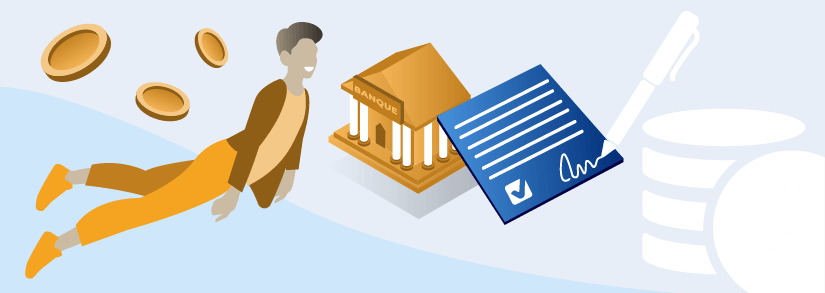

Ce notebook permet de tester plusieurs modèles et de les optimiser en variant certains de leurs hyperparamètres.
Les modèles évalués dans ce notebook sont :

- un modèle de référence KNN (K-nearest neighbors)
- un modèle linéaire de régression logistique
- un modèle linéaire de Machine à vecteurs de support (SVM)
- un modèle non linéaire d'arbre de décision
- un modèle non linéaire de Random Forest
- un modèle ensembliste Gradient Boosting Classifier
- un modèle ensembliste XGBClassifier
- un modèle ensembliste LightGBM Classifier
- un modèle de réseau de neurones MLP Classifier
- un modèle ensembliste Voting

Les critères sur lesquels ont été évalués les modèles sont les suivants :
- le temps de calcul
- les scores (sensibilité, precision, exactitude)
- le bénéfice supplémentaire par dollar investi

En fin de notebook, les différentes bases de données à notre disposition ont été évaluées pour permettre de sélectionner celle qui donnera les meilleures performances au modèle choisi.

# Préparation, visualisation et exploration des données

## Importation des données et des librairies

### Importation des librairies utiles au projet

In [1]:
# numpy and pandas pour la manipulation des données
import numpy as np
import pandas as pd # le panda passe 12h de sa journée à manger du bambou
# matplotlib and seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# File system management
import os

In [2]:
# Les fonctions personnaliées
import mes_packages.Charles_Xavier.modeles_simples as my_mdl_s
import mes_packages.Charles_Xavier.evaluation_modele as my_eval
import mes_packages.Mystique_Raven.special_p4 as my_sp4

# Palette de couleur
a, b, c, d, e = [
    plt.cm.Blues, plt.cm.Oranges, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples
]

In [3]:
# Pour faire un over sampling
from imblearn.over_sampling import SMOTE

# Pour effectuer une PCA avant le modèle
from sklearn.decomposition import PCA


In [4]:
# Les différents modèles testés
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

Nous chargeons la base de données application_train nettoyée et complétée par de nouvelles variables.

In [5]:
import os
from dotenv import load_dotenv  # Pour récupérer les variables d'environnement

load_dotenv('var.env')  # Importation des variables d'environnement

# Récupération des variables d'environnement
chemin = os.environ['CHEMIN']

In [6]:
application_train = pd.read_csv(chemin + "application_train.csv",
                                low_memory=False)
''' Cette fonction procède au nettoyage des variables
de la base de données application.
Ensuite, elle ajoute de nouvelles variables pertinentes
    à la base de données

Entrées :
df : le dataframe

Renvoie :
df : le dataframe nettoyé et avec de nouvelles variables'''

# Nettoyage de la base de données et ajout de nouvelles variables
df_nv = my_sp4.clean_fe_application(application_train)
df_nv.replace([np.inf, -np.inf], np.nan, inplace=True)
df_nv = df_nv.fillna(0)


*Fonction by Sandy M.*

La base de données avant nettoyage présente  307511 entrées pour  122 variables
~ Remplacement des valeurs erronées et des valeurs manquantes par "unknown" : effectué
~ Conversion des $ en k$ : effectué
~ Correction du signe des données en jours : effectué
~ Correction des valeurs aberrantes : effectué
~ Imputation des valeurs manquantes par les moyennes ou les médianes: effectué
~ Suppression des variables non-pertinentes pour cette étude : effectué

 -----L'étape de nettoyage des variables est terminée-----

La base de données après nettoyage présente 307506 entrées pour 56 variables.
 66 variables ont été écartées de l'étude et 56 variables ont été nettoyées
Ajout des variables 'MONTANT_PAR_JOB_MED',  'MONTANT_PAR_POSTE_MED' et 'MONTANT_PAR_EDU_MED'
Ajout des variables 'RAPPORT_CREDIT_INCOME',  'RAPPORT_ANNUITY_INCOME', 'RAPPORT_CREDIT_ANNUITY',  'RATIO_CREDIT_GOODS', 'EXT_SOURCES_MOY' et   'INCOME_PAR_MEMB_FAM'
Ajout des variables 'RATIO_CAR_BIRTH' et  'RATIO_PHONE_BIRTH'
Ajout des

In [7]:
df = df_nv.sample(10000)
del df_nv

# Application et comparaison des différents modèles

Pour pouvoir comparer les différents modèles, les données de performance de chacun sont stockées dans des variables.

In [8]:
df_modeles = []
i = 0

In [9]:
# Importation du fichier de configuration
import configparser
config = configparser.ConfigParser()
config.read('my_config.ini')

['my_config.ini']

In [10]:
mon_smote = eval(config['MY_PARAM']['my_smote'])
ma_PCA = eval(config.get('MY_PARAM','my_pca'))

## Le modèle KNN

In [11]:
mon_knn = eval(config['MY_MODELS']['my_knn'])
type(mon_knn)

sklearn.neighbors._classification.KNeighborsClassifier


*Fonction by Sandy M.*

temps de calcul : 0.8 sec
Matrice de confusion


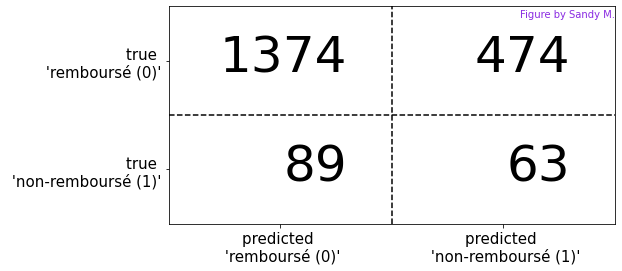

il y a : 
 1374 Vrais Négatifs                (le prêt a été remboursé) 
 474 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 89 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 63 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1848
           1       0.12      0.41      0.18       152

    accuracy                           0.72      2000
   macro avg       0.53      0.58      0.51      2000
weighted avg       0.88      0.72      0.78      2000

knn : ROC AUC=0.629 Dummy: ROC AUC=0.511


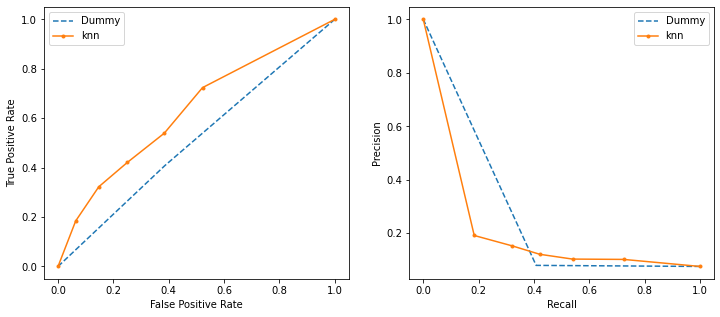

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,KNN,0.41,0.18,0.2,0.8,7572.0,757.0,9.0


In [12]:
prediction, y_test, score_auc, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'knn',
        mon_knn,
        smote = mon_smote,
        pca = ma_PCA,
        afficher_roc = 'oui')

benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
df_modeles = my_eval.tableau_modeles(df_modeles, 'KNN', prediction, y_test, score_auc, temps, benef, edem, edol, i)
i += 1
df_modeles


*Fonction by Sandy M.*

la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  83160.0 k$
le bénéfice sans modèle est  -27007.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  56153.0 k$
le bénéfice supplémentaire sans modèle est  0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  757.22 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  9.09 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  43459.0 k$
la somme supplémentaire perdue avec modèle est  35886.0 k$
le bénéfice supplémentaire avec modèle est

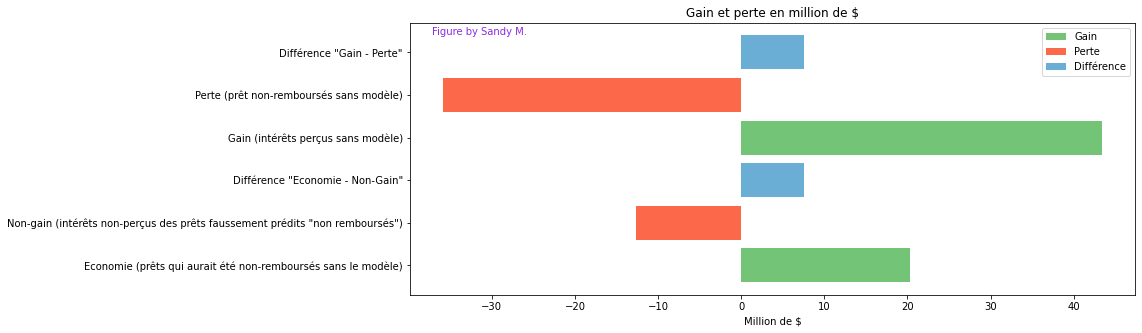

In [13]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

## Regression linéaire

### Logistic Regression

La régression logistique permet de modéliser la probabilité que la demande de prêt d'un client appartienne à la classe "non-remboursé" (la classe positive, 'TARGET' = 1). Cette probabilité repose sur une transformation logistique d'une combinaison linéaire des variables.

A chaque variable est attribué un coefficient. Ces coefficients s'apprennent par maximisation de vraisemblance (ou du log de la vraisemblance).

In [14]:
mon_lr = eval(config['MY_MODELS']['my_lr'])
type(mon_lr)

sklearn.linear_model._logistic.LogisticRegression


*Fonction by Sandy M.*

temps de calcul : 0.3 sec
Matrice de confusion


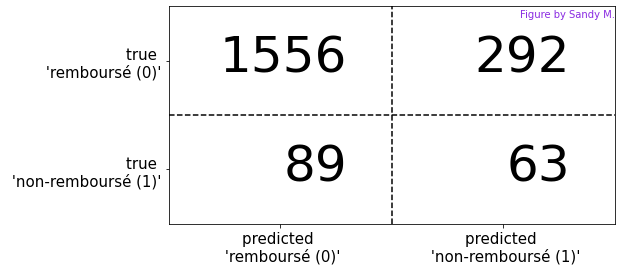

il y a : 
 1556 Vrais Négatifs                (le prêt a été remboursé) 
 292 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 89 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 63 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1848
           1       0.18      0.41      0.25       152

    accuracy                           0.81      2000
   macro avg       0.56      0.63      0.57      2000
weighted avg       0.89      0.81      0.84      2000

Logistic Regression : ROC AUC=0.720 Dummy: ROC AUC=0.482


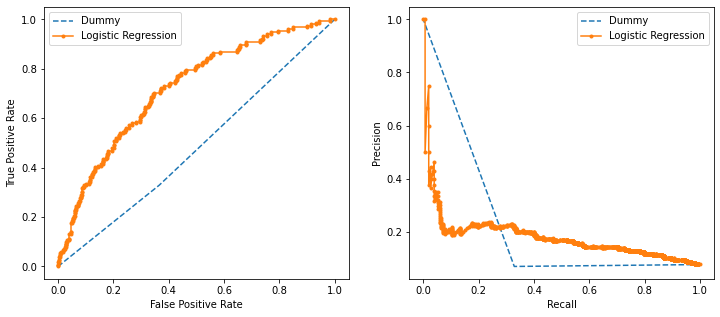

In [15]:
prediction, y_test, score_auc, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'Logistic Regression',
        mon_lr,
        smote = mon_smote,
        pca = ma_PCA,
        afficher_roc = 'oui')


*Fonction by Sandy M.*

la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  83160.0 k$
le bénéfice sans modèle est  -27007.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  56153.0 k$
le bénéfice supplémentaire sans modèle est  0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  1347.9 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  14.45 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  48388.0 k$
la somme supplémentaire perdue avec modèle est  34909.0 k$
le bénéfice supplémentaire avec modèle es

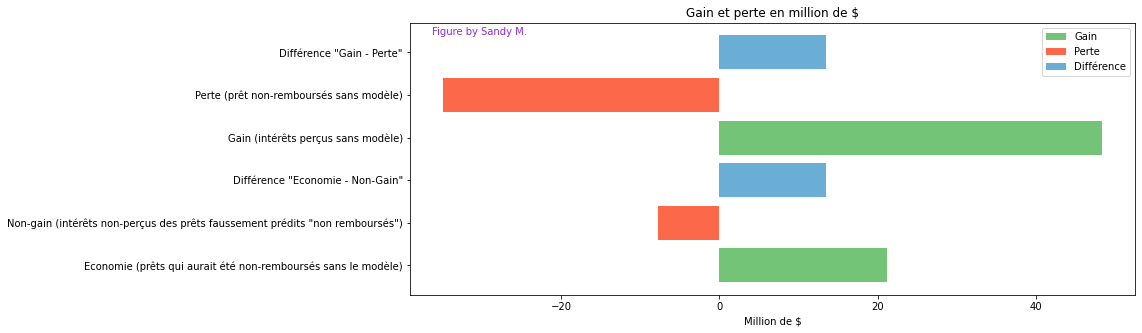

In [16]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

#### Recherche des hyperparamètres optimaux

Plusieurs paramètres peuvent influencer la performance de la regression logistique.

D'abord, le paramètre C, qui est inversement proportionnel à la force de la régularisation.
Il est aussi possible de choisir le type de solveur (qui fournit une solution numérique au problème de maximisation de la vraisemblance). Par exemple, pour notre échantillon, le solveur 'liblinear' est plutôt judicieux. En effet, notre échantillon n'est pas imposant et notre objectif est de pouvoir focaliser les performances sur le débuscage des cible positive.
Enfin, les techniques de régularisation des modèles linéaires ℓ1 et ℓ2 s'appliquent aussi à la régression logistique. Ces régulateurs permettent d'éviter le surapprentissage. La norme ℓ1 permet d'obtenir un modèle parcimonieux alors que la norme ℓ2 pénalise le problème en réduisant le poids des variables.

Les paramètres C et ℓ1 vs ℓ2 vont être optimisés grâce à une grille de recherche (GridSearch)

In [17]:
my_mdl_s.grid_modele(df.drop(columns=['SK_ID_CURR']),
            "TARGET",
            mon_lr.set_params(solver = 'liblinear'), {'C': np.logspace(-3, 3, 7) , 'penalty':['l1','l2'] },
            cv=5,
            score='recall')

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'C': 10.0, 'penalty': 'l1'}
Résultats de la validation croisée :
recall = 0.000 (+/-0.000) for {'C': 0.001, 'penalty': 'l1'}
recall = 0.000 (+/-0.000) for {'C': 0.001, 'penalty': 'l2'}
recall = 0.000 (+/-0.000) for {'C': 0.01, 'penalty': 'l1'}
recall = 0.006 (+/-0.006) for {'C': 0.01, 'penalty': 'l2'}
recall = 0.009 (+/-0.015) for {'C': 0.1, 'penalty': 'l1'}
recall = 0.011 (+/-0.021) for {'C': 0.1, 'penalty': 'l2'}
recall = 0.017 (+/-0.027) for {'C': 1.0, 'penalty': 'l1'}
recall = 0.017 (+/-0.018) for {'C': 1.0, 'penalty': 'l2'}
recall = 0.020 (+/-0.037) for {'C': 10.0, 'penalty': 'l1'}
recall = 0.020 (+/-0.037) for {'C': 10.0, 'penalty': 'l2'}
recall = 0.020 (+/-0.037) for {'C': 100.0, 'penalty': 'l1'}
recall = 0.020 (+/-0.037) for {'C': 100.0, 'penalty': 'l2'}
recall = 0.020 (+/-0.037) for {'C': 1000.0, 'penalty': 'l1'}
recall = 0.020 (+/-0.037) for {'C': 1000.0, 'penalty': 'l2'}

Sur le jeu de test : 0.020


#### Modèle optimisé

In [18]:
# Enregistrement des paramètres
mon_lr.set_params(solver = 'liblinear', C= 10, penalty = 'l1')
config['MY_MODELS']['my_lr_opti'] = str(mon_lr)
config['MY_MODELS']['my_lr_params'] = str(mon_lr.get_params(deep=True))
with open('my_config.ini', 'w') as configfile:
    config.write(configfile)

In [19]:
# Récupération des paramètres
config.read('my_config.ini')
mon_lr = eval(config['MY_MODELS']['my_lr_opti'])
mon_lr = mon_lr.set_params(**eval(config['MY_MODELS']['my_lr_params']))


*Fonction by Sandy M.*

temps de calcul : 0.3 sec
Matrice de confusion


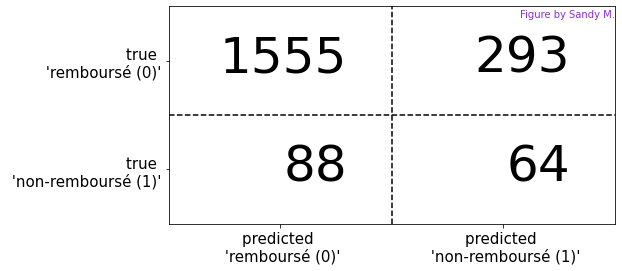

il y a : 
 1555 Vrais Négatifs                (le prêt a été remboursé) 
 293 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 88 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 64 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1848
           1       0.18      0.42      0.25       152

    accuracy                           0.81      2000
   macro avg       0.56      0.63      0.57      2000
weighted avg       0.89      0.81      0.84      2000

Logistic Regression : ROC AUC=0.721 Dummy: ROC AUC=0.508


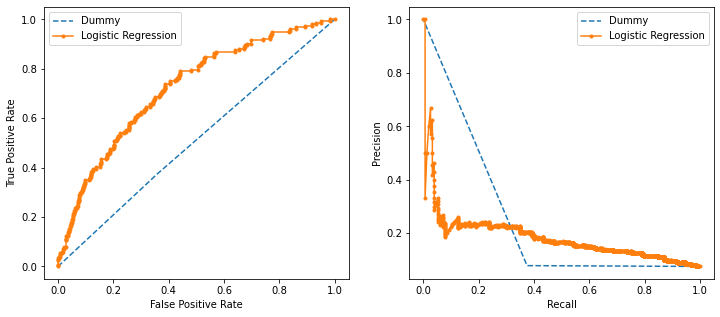

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,KNN,0.41,0.18,0.20,0.8,7572.0,757.0,9.0
1,Logistic Regression,0.42,0.25,0.19,0.3,13521.0,1352.0,14.0


In [20]:
prediction, y_test, score_auc, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'Logistic Regression',
        mon_lr,
        smote = mon_smote,
        pca = ma_PCA,
        afficher_roc = 'oui')

benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
df_modeles = my_eval.tableau_modeles(df_modeles, 'Logistic Regression', prediction, y_test, score_auc, temps, benef, edem, edol, i)
i += 1
df_modeles


*Fonction by Sandy M.*

la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  83160.0 k$
le bénéfice sans modèle est  -27007.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  56153.0 k$
le bénéfice supplémentaire sans modèle est  0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  1352.07 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  14.5 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  48369.0 k$
la somme supplémentaire perdue avec modèle est  34848.0 k$
le bénéfice supplémentaire avec modèle es

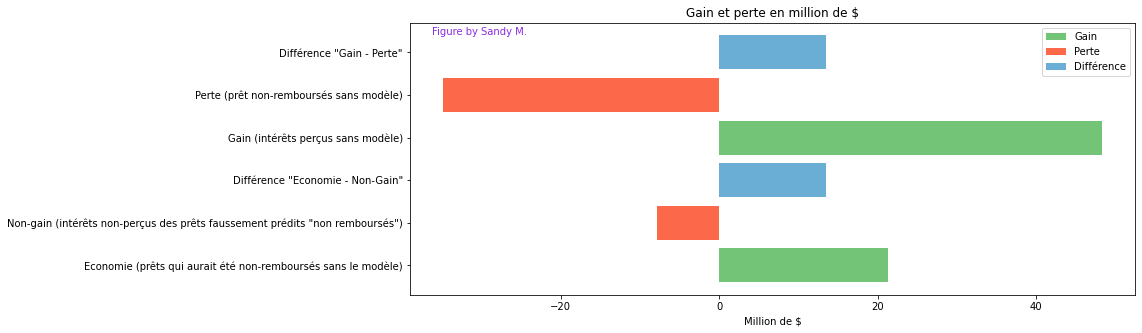

In [21]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

### SVM : Machines à Vecteurs de Support

Les SVM (Support Vector Machines) modélisent des hyperplans capables de séparer linéairement les données. Ces hyperplans sont situés prêts de points de jeu de données qui représentent les vecteurs de support. L'idée est de maximiser la distance (la marge) entre les hyperplans.

La sélection du kernel (noyau) 'rbf' permet de transformer notre problème (initialement non-linéaire) en problème linéaire pour obtenir un modèle plus performant (dans ce cas, notre SVM devient un modèle SVM à noyaux). Nos données sont redécrites dans un nouvel espace qui permet d'apprendre une fonction de décision linéaire.

Comme pour la regression logistique, plusieurs paramètres peuvent être optimiser grâce à GridSearch.

#### Recherche des hyperparamètres optimaux

In [22]:
mon_svm = eval(config['MY_MODELS']['my_svm'])
type(mon_svm)

sklearn.svm._classes.SVC

In [23]:
my_mdl_s.grid_modele(df.drop(columns=['SK_ID_CURR']),
            "TARGET",
            mon_svm, {'C': np.logspace(-3, 3, 7)  },
            cv=5,
            score='recall')

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'C': 1000.0}
Résultats de la validation croisée :
recall = 0.000 (+/-0.000) for {'C': 0.001}
recall = 0.000 (+/-0.000) for {'C': 0.01}
recall = 0.000 (+/-0.000) for {'C': 0.1}
recall = 0.000 (+/-0.000) for {'C': 1.0}
recall = 0.000 (+/-0.000) for {'C': 10.0}
recall = 0.097 (+/-0.016) for {'C': 100.0}
recall = 0.133 (+/-0.044) for {'C': 1000.0}

Sur le jeu de test : 0.105


#### Modèle optimisé

In [24]:
# Enregistrement des paramètres
mon_svm.set_params(C = 1000)
config['MY_MODELS']['my_svm_opti'] = str(mon_svm)
config['MY_MODELS']['my_svm_params'] = str(mon_svm.get_params(deep=True))
with open('my_config.ini', 'w') as configfile:
    config.write(configfile)

In [25]:
# Récupération des paramètres
config.read('my_config.ini')
mon_svm = eval(config['MY_MODELS']['my_svm_opti'])
mon_svm = mon_svm.set_params(**eval(config['MY_MODELS']['my_svm_params']))


*Fonction by Sandy M.*

temps de calcul : 32.8 sec
Matrice de confusion


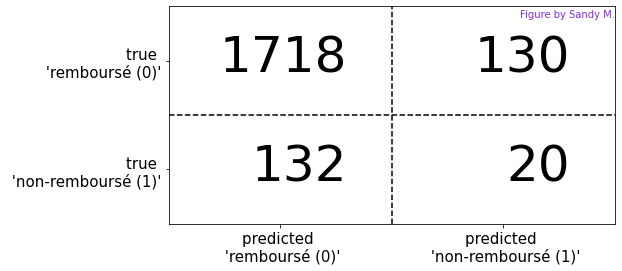

il y a : 
 1718 Vrais Négatifs                (le prêt a été remboursé) 
 130 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 132 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 20 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1848
           1       0.13      0.13      0.13       152

    accuracy                           0.87      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.87      0.87      0.87      2000

Machines à Vecteurs de Support : ROC AUC=0.614 Dummy: ROC AUC=0.481


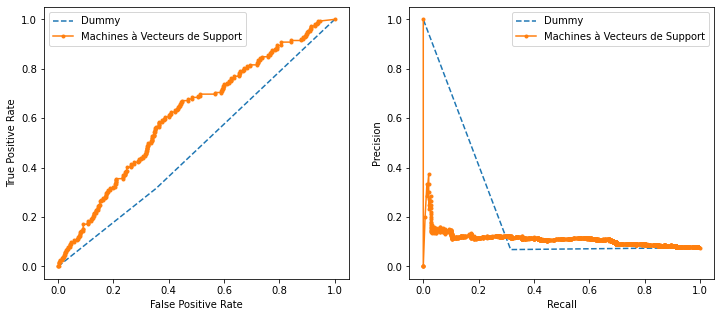

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,KNN,0.41,0.18,0.20,0.8,7572.0,757.0,9.0
1,Logistic Regression,0.42,0.25,0.19,0.3,13521.0,1352.0,14.0
2,Machines à Vecteurs de Support,0.13,0.13,0.11,32.8,1906.0,191.0,2.0


In [26]:
prediction, y_test, score_auc, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'Machines à Vecteurs de Support',
        mon_svm,
        smote = mon_smote,
        pca = ma_PCA,
        afficher_roc = 'oui')

benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
df_modeles = my_eval.tableau_modeles(df_modeles, 'Machines à Vecteurs de Support', prediction, y_test, score_auc, temps, benef, edem, edol, i)
i += 1
df_modeles


*Fonction by Sandy M.*

la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  83160.0 k$
le bénéfice sans modèle est  -27007.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  56153.0 k$
le bénéfice supplémentaire sans modèle est  0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  190.56 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  1.89 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  52854.0 k$
la somme supplémentaire perdue avec modèle est  50949.0 k$
le bénéfice supplémentaire avec modèle est

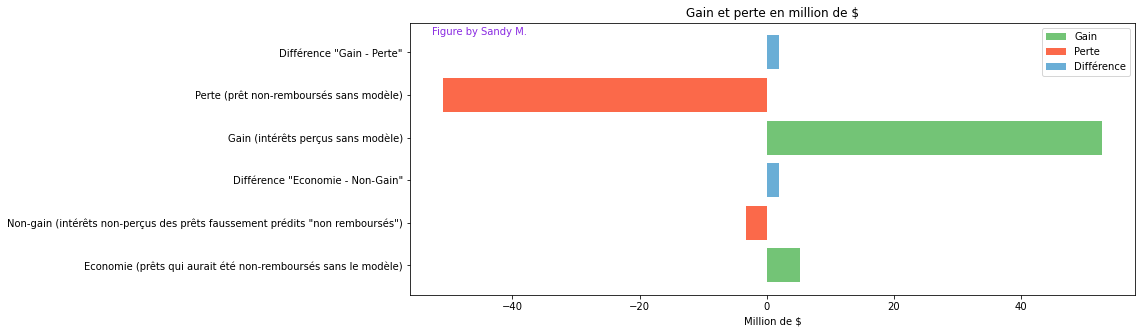

In [27]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

## Les modèles non-linéaires

### Arbre de décision

In [28]:
mon_add = eval(config['MY_MODELS']['my_add'])
type(mon_add)

sklearn.tree._classes.DecisionTreeClassifier

L'apprentissage par arbre de décision a pour but est de créer un modèle qui prédit la valeur de notre variable cible à partir de la valeur de plusieurs variables.


*Fonction by Sandy M.*

temps de calcul : 0.4 sec
Matrice de confusion


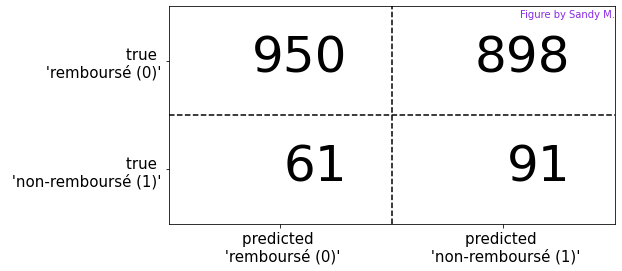

il y a : 
 950 Vrais Négatifs                (le prêt a été remboursé) 
 898 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 61 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 91 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.94      0.51      0.66      1848
           1       0.09      0.60      0.16       152

    accuracy                           0.52      2000
   macro avg       0.52      0.56      0.41      2000
weighted avg       0.88      0.52      0.63      2000

Arbre de décision : ROC AUC=0.588 Dummy: ROC AUC=0.537


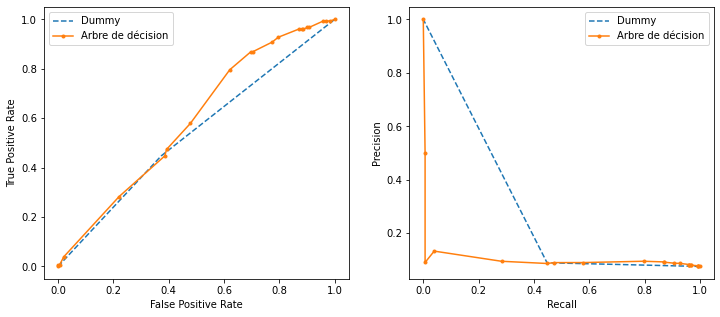

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,KNN,0.41,0.18,0.20,0.8,7572.0,757.0,9.0
1,Logistic Regression,0.42,0.25,0.19,0.3,13521.0,1352.0,14.0
2,Machines à Vecteurs de Support,0.13,0.13,0.11,32.8,1906.0,191.0,2.0
3,Arbre de décision,0.60,0.16,0.10,0.4,5241.0,524.0,11.0


In [29]:
prediction, y_test, score_auc, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'Arbre de décision',
        mon_add,
        smote = mon_smote,
        pca = ma_PCA,
        afficher_roc = 'oui')

benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
df_modeles = my_eval.tableau_modeles(df_modeles, 'Arbre de décision', prediction, y_test, score_auc, temps, benef, edem, edol, i)
i += 1
df_modeles


*Fonction by Sandy M.*

la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  83160.0 k$
le bénéfice sans modèle est  -27007.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  56153.0 k$
le bénéfice supplémentaire sans modèle est  -0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  524.12 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  10.72 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  25451.0 k$
la somme supplémentaire perdue avec modèle est  20210.0 k$
le bénéfice supplémentaire avec modèle e

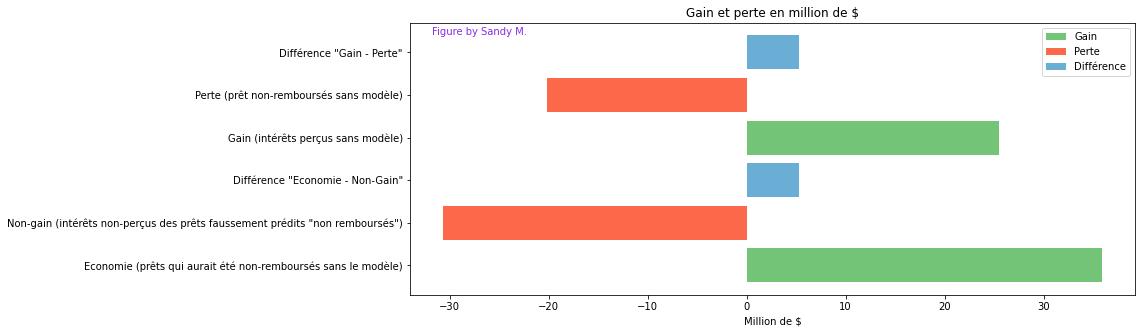

In [30]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

### Random Forest Classifier

In [31]:
mon_rfc = eval(config['MY_MODELS']['my_rfc'])
type(mon_rfc)

sklearn.ensemble._forest.RandomForestClassifier

L'algorithme Random Forest se base sur l'assemblage d'un variété d'arbres de décision.
Chaque arbre de décision est entraîné parallèlement aux autres et sur des groupes de données différents.
L'association des différents arbres obtenus permet de réduire la variance des prévisions d'un arbre de décision seul, améliorant ainsi leurs performances.

Il est intéressant de chercher à maximiser la performance du modèle en étudiant l'influence du nombre d'arbres de la forêt (n_estimators) et leur 'pronfondeur' (max_depth).

#### Hyperparamètre max_depth

In [32]:
df_resultats = []
i = 0

for nd in range(1, 20, 1):
    prediction, y_test, score_train, score_test, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'Random Forest',
        mon_rfc.set_params(max_depth=nd),
        pca = ma_PCA,
        smote = mon_smote,
        evaluation='oui')
    
    benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
    df_resultats = my_eval.tableau_resultats(df_resultats, prediction, y_test, score_train, score_test, temps, benef, edem, edol, nd, i)
    i += 1
df_resultats

,valeur paramètre,errors_train,errors_test,f1_Négatifs,f1_Positifs,recall,f1,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,1.0,7.96,7.60,0.96,0.00,0.00,0.00,2.6,0.0,0.0,0.0
1,2.0,7.96,7.60,0.96,0.00,0.00,0.00,4.0,0.0,0.0,0.0
2,3.0,8.88,8.50,0.96,0.11,0.07,0.11,5.6,1721.0,172.0,2.0
3,4.0,10.60,9.60,0.95,0.19,0.15,0.19,7.1,4640.0,464.0,4.0
4,5.0,11.76,11.60,0.94,0.19,0.18,0.19,8.3,4262.0,426.0,4.0
5,6.0,11.86,12.00,0.93,0.23,0.24,0.23,9.5,6769.0,677.0,7.0
6,7.0,11.46,12.70,0.93,0.23,0.24,0.23,10.7,6498.0,650.0,6.0
7,8.0,11.31,13.35,0.93,0.22,0.24,0.22,11.9,6166.0,617.0,6.0
8,9.0,9.42,13.05,0.93,0.22,0.24,0.22,13.4,6573.0,657.0,6.0
9,10.0,8.01,12.90,0.93,0.23,0.25,0.23,14.3,6733.0,673.0,7.0


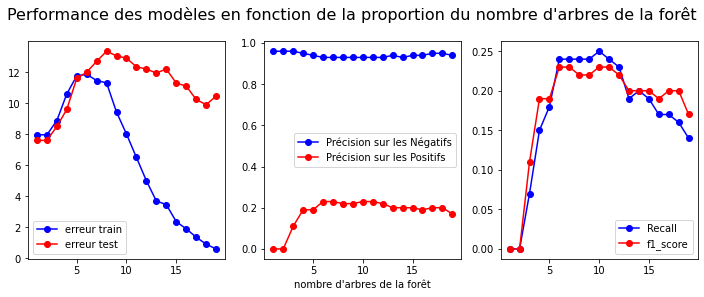

In [33]:
my_eval.graphiques_scores(
    df_resultats['valeur paramètre'], df_resultats['errors_train'],
    df_resultats['errors_test'], df_resultats['f1_Négatifs'],
    df_resultats['f1_Positifs'], df_resultats['recall'], df_resultats['f1'],
    "nombre d'arbres de la forêt",
    "Performance des modèles en fonction de la proportion du nombre d'arbres de la forêt"
)

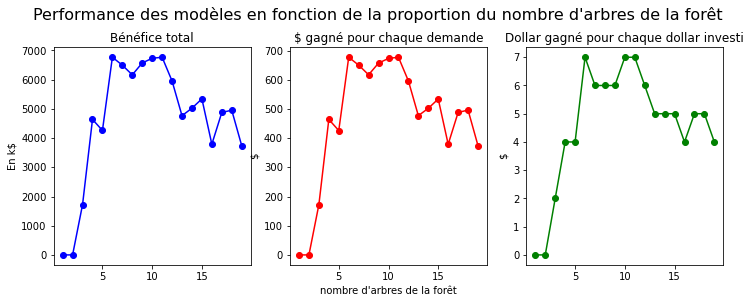

In [34]:
my_eval.graphiques_benefice(
    df_resultats['valeur paramètre'], df_resultats['Bénéfice Total'], df_resultats['Bénéfice par demande'],
    df_resultats['Bénéfice par dollar'], "nombre d'arbres de la forêt",
    "Performance des modèles en fonction de la proportion du nombre d'arbres de la forêt"
)

Le modèle commence à être performant pour un paramètre max_depth égal à 5.

In [35]:
mon_rfc = mon_rfc.set_params(max_depth=5)

#### Hyperparamètre n_estimators

In [36]:
df_resultats = []
i = 0

for n_e in range(50, 600, 50):
    prediction, y_test, score_train, score_test, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'Random Forest',
        mon_rfc.set_params(n_estimators=n_e),
        pca = ma_PCA,
        smote = mon_smote,
        evaluation='oui')
    
    benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
    df_resultats = my_eval.tableau_resultats(df_resultats, prediction, y_test, score_train, score_test, temps, benef, edem, edol, n_e, i)
    i += 1
df_resultats

,valeur paramètre,errors_train,errors_test,f1_Négatifs,f1_Positifs,recall,f1,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,50.0,12.11,11.65,0.94,0.21,0.20,0.21,1.8,5436.0,544.0,5.0
1,100.0,11.48,11.05,0.94,0.22,0.20,0.22,3.0,5931.0,593.0,6.0
2,150.0,11.65,11.30,0.94,0.22,0.20,0.22,4.2,5797.0,580.0,6.0
3,200.0,11.89,11.35,0.94,0.22,0.21,0.22,5.6,5946.0,595.0,6.0
4,250.0,11.91,10.85,0.94,0.23,0.21,0.23,7.1,5964.0,596.0,6.0
5,300.0,12.05,11.30,0.94,0.22,0.21,0.22,8.4,5888.0,589.0,6.0
6,350.0,11.74,10.80,0.94,0.23,0.22,0.23,9.6,5885.0,589.0,6.0
7,400.0,11.84,10.90,0.94,0.23,0.22,0.23,11.2,6605.0,661.0,6.0
8,450.0,11.74,11.45,0.94,0.21,0.20,0.21,12.2,5578.0,558.0,5.0
9,500.0,11.88,11.00,0.94,0.23,0.22,0.23,13.7,6381.0,638.0,6.0


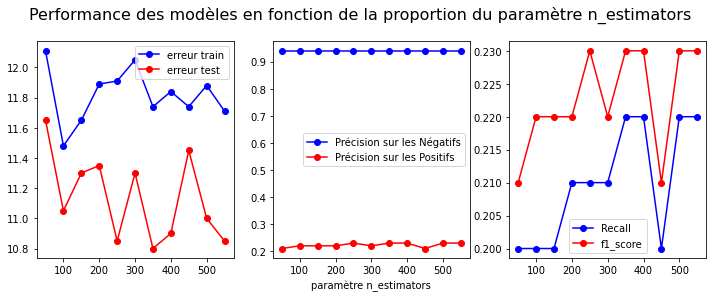

In [37]:
my_eval.graphiques_scores(
    df_resultats['valeur paramètre'], df_resultats['errors_train'],
    df_resultats['errors_test'], df_resultats['f1_Négatifs'],
    df_resultats['f1_Positifs'], df_resultats['recall'], df_resultats['f1'],
    'paramètre n_estimators',
    "Performance des modèles en fonction de la proportion du paramètre n_estimators"
)

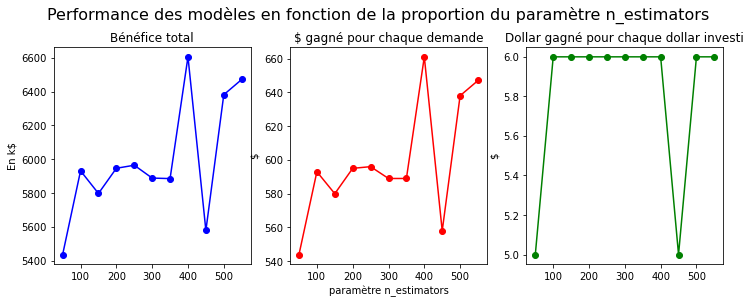

In [38]:
my_eval.graphiques_benefice(
    df_resultats['valeur paramètre'], df_resultats['Bénéfice Total'], df_resultats['Bénéfice par demande'],
    df_resultats['Bénéfice par dollar'], 'paramètre n_estimators',
    "Performance des modèles en fonction de la proportion du paramètre n_estimators"
)

Le modèle a un bénéfice intéressant à partir de n_estimators = 400

#### Modèle optimisé

In [39]:
# Enregistrement des paramètres
mon_rfc.set_params(max_depth=5, n_estimators=400)
config['MY_MODELS']['my_rfc_opti'] = str(mon_rfc)
config['MY_MODELS']['my_rfc_params'] = str(mon_rfc.get_params(deep=True))
with open('my_config.ini', 'w') as configfile:
    config.write(configfile)

In [40]:
# Récupération des paramètres
config.read('my_config.ini')
mon_rfc = eval(config['MY_MODELS']['my_rfc_opti'])
mon_rfc = mon_rfc.set_params(**eval(config['MY_MODELS']['my_rfc_params']))


*Fonction by Sandy M.*

temps de calcul : 11.5 sec
Matrice de confusion


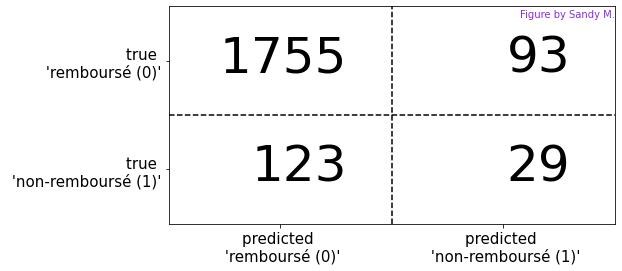

il y a : 
 1755 Vrais Négatifs                (le prêt a été remboursé) 
 93 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 123 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 29 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1848
           1       0.24      0.19      0.21       152

    accuracy                           0.89      2000
   macro avg       0.59      0.57      0.58      2000
weighted avg       0.88      0.89      0.89      2000

Random Forest : ROC AUC=0.688 Dummy: ROC AUC=0.489


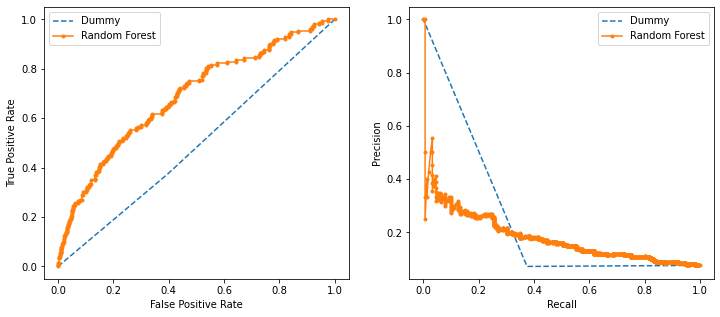

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,KNN,0.41,0.18,0.20,0.8,7572.0,757.0,9.0
1,Logistic Regression,0.42,0.25,0.19,0.3,13521.0,1352.0,14.0
2,Machines à Vecteurs de Support,0.13,0.13,0.11,32.8,1906.0,191.0,2.0
3,Arbre de décision,0.60,0.16,0.10,0.4,5241.0,524.0,11.0
11,Random Forest,0.19,0.21,0.18,11.5,5474.0,547.0,5.0


In [41]:
prediction, y_test, score_auc, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'Random Forest',
        mon_rfc,
        smote = mon_smote,
        pca = ma_PCA,
        afficher_roc = 'oui')

benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
df_modeles = my_eval.tableau_modeles(df_modeles, 'Random Forest', prediction, y_test, score_auc, temps, benef, edem, edol, i)
i += 1
df_modeles


*Fonction by Sandy M.*

la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  83160.0 k$
le bénéfice sans modèle est  -27007.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  56153.0 k$
le bénéfice supplémentaire sans modèle est  0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  547.41 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  5.27 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  54391.0 k$
la somme supplémentaire perdue avec modèle est  48917.0 k$
le bénéfice supplémentaire avec modèle est

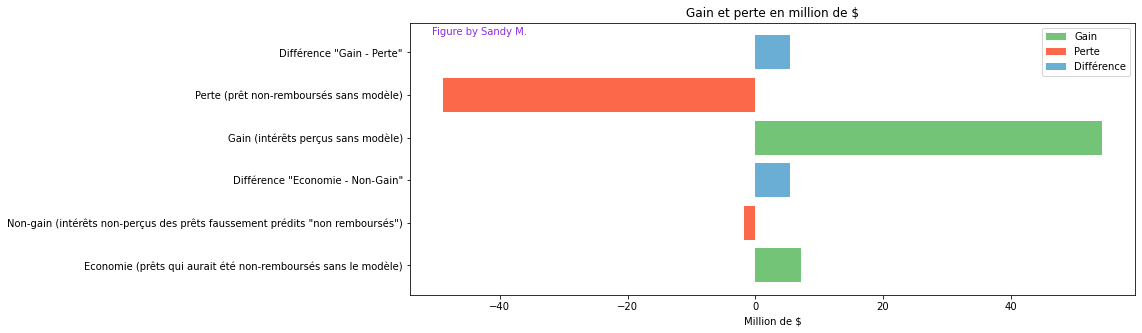

In [42]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

### Gradient Boosting Classifier

In [43]:
mon_gbc = eval(config['MY_MODELS']['my_gbc'])
type(mon_gbc)

sklearn.ensemble._gb.GradientBoostingClassifier

L’algorithme Gradient Boosting Classifier est un cas particulier du Boosting. Le Boosting utilise plusieurs modèles pour les aggréger et obtenir un seul résultat final. La construction du modèle se fait de manière séquentielle. Un premier modèle est évaluer par l'algorithme. Cette évaluation engendre une pondération de chacun de nos clients en fonction de la performance de la prédiction obtenue.
L'idée générale est de donner beaucoup de poids aux clients dont la prédiction de la valeur cible est erronée. Cette pondération s'applique pour la construction du modèle suivant. Au fur et à mesure de la construction eds modèles, le poids est corrigé pour les clients dont la cible est difficile à prédire. Ceci permet petit à petit de prédire la classe des données très difficiles à classer au départ.

#### Hyperparamètre n_estimators

In [44]:
df_resultats = []
i = 0

for n_e in range(50, 600, 50):
    prediction, y_test, score_train, score_test, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'Gradient Boosting',
        mon_gbc.set_params(n_estimators=n_e),
        pca = ma_PCA,
        smote = mon_smote,
        evaluation='oui')
    
    benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
    df_resultats = my_eval.tableau_resultats(df_resultats, prediction, y_test, score_train, score_test, temps, benef, edem, edol, n_e, i)
    i += 1
df_resultats

,valeur paramètre,errors_train,errors_test,f1_Négatifs,f1_Positifs,recall,f1,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,50.0,18.79,18.65,0.89,0.24,0.38,0.24,1.7,11194.0,1119.0,12.0
1,100.0,18.79,18.85,0.89,0.24,0.39,0.24,3.0,13659.0,1366.0,15.0
2,150.0,18.96,19.90,0.89,0.24,0.41,0.24,4.2,13450.0,1345.0,15.0
3,200.0,18.69,19.55,0.89,0.26,0.44,0.26,5.6,14692.0,1469.0,16.0
4,250.0,18.39,19.75,0.89,0.24,0.41,0.24,6.8,13852.0,1385.0,15.0
5,300.0,18.41,20.35,0.88,0.22,0.38,0.22,7.8,11518.0,1152.0,13.0
6,350.0,18.69,19.75,0.89,0.25,0.43,0.25,9.2,13583.0,1358.0,15.0
7,400.0,18.47,20.45,0.88,0.24,0.43,0.24,10.3,12786.0,1279.0,14.0
8,450.0,18.81,21.00,0.88,0.24,0.43,0.24,11.5,13420.0,1342.0,15.0
9,500.0,18.20,20.40,0.88,0.22,0.39,0.22,12.9,11129.0,1113.0,12.0


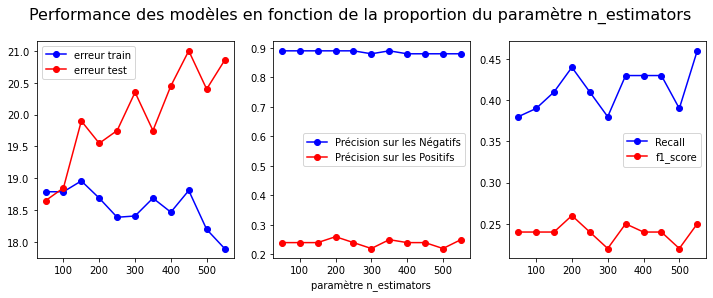

In [45]:
my_eval.graphiques_scores(
    df_resultats['valeur paramètre'], df_resultats['errors_train'],
    df_resultats['errors_test'], df_resultats['f1_Négatifs'],
    df_resultats['f1_Positifs'], df_resultats['recall'], df_resultats['f1'],
    'paramètre n_estimators',
    "Performance des modèles en fonction de la proportion du paramètre n_estimators"
)

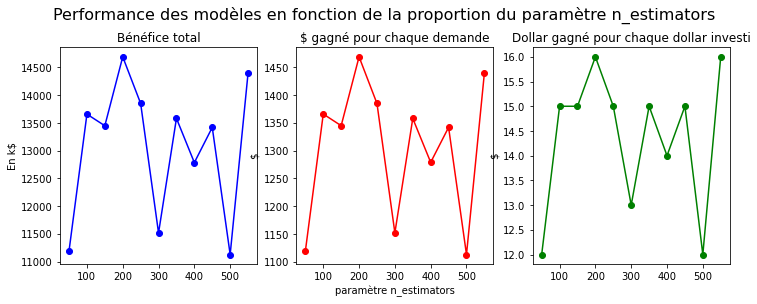

In [46]:
my_eval.graphiques_benefice(
    df_resultats['valeur paramètre'], df_resultats['Bénéfice Total'], df_resultats['Bénéfice par demande'],
    df_resultats['Bénéfice par dollar'], 'paramètre n_estimators',
    "Performance des modèles en fonction de la proportion du paramètre n_estimators"
)

In [47]:
mon_gbc = mon_gbc.set_params(n_estimators=100)

Le nombre n_estimators semble être optimal à partir d'une valeur de 100.

#### Hyperparamètre learning_rate

In [48]:
df_resultats = []
i = 0

for l_r in range(1, 21, 2):
    l_r=l_r/10
    prediction, y_test, score_train, score_test, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'Gradient Boosting',
        mon_gbc.set_params(learning_rate=l_r),
        pca = ma_PCA,
        smote = mon_smote,
        evaluation='oui')
    
    benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
    df_resultats = my_eval.tableau_resultats(df_resultats, prediction, y_test, score_train, score_test, temps, benef, edem, edol, l_r, i)
    i += 1
df_resultats

,valeur paramètre,errors_train,errors_test,f1_Négatifs,f1_Positifs,recall,f1,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,0.1,14.80,14.90,0.92,0.22,0.27,0.22,3.0,7465.0,747.0,8.0
1,0.3,18.13,18.30,0.90,0.22,0.35,0.22,2.9,11633.0,1163.0,12.0
2,0.5,18.56,19.10,0.89,0.24,0.39,0.24,2.9,14059.0,1406.0,15.0
3,0.7,19.24,20.40,0.88,0.24,0.42,0.24,2.9,14359.0,1436.0,16.0
4,0.9,19.89,20.60,0.88,0.25,0.45,0.25,2.8,14982.0,1498.0,16.0
5,1.1,19.73,21.35,0.88,0.23,0.41,0.23,2.9,12626.0,1263.0,14.0
6,1.3,20.08,21.40,0.88,0.24,0.44,0.24,2.8,13515.0,1352.0,15.0
7,1.5,20.67,22.70,0.87,0.21,0.39,0.21,2.8,9931.0,993.0,11.0
8,1.7,20.85,22.55,0.87,0.21,0.39,0.21,2.8,10708.0,1071.0,12.0
9,1.9,43.39,42.50,0.71,0.19,0.66,0.19,2.9,11645.0,1164.0,17.0


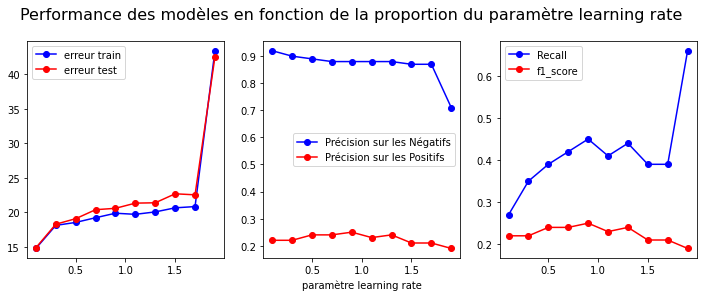

In [49]:
my_eval.graphiques_scores(
    df_resultats['valeur paramètre'], df_resultats['errors_train'],
    df_resultats['errors_test'], df_resultats['f1_Négatifs'],
    df_resultats['f1_Positifs'], df_resultats['recall'], df_resultats['f1'],
    'paramètre learning rate',
    "Performance des modèles en fonction de la proportion du paramètre learning rate"
)

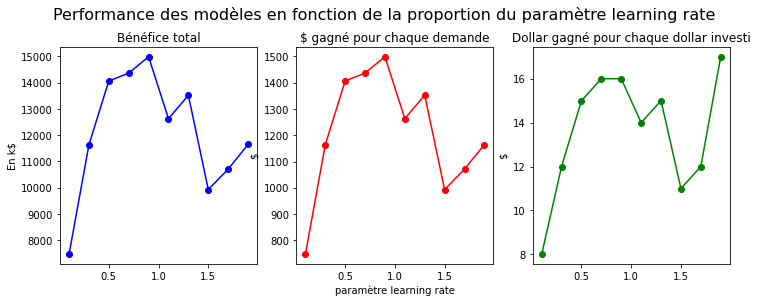

In [50]:
my_eval.graphiques_benefice(
    df_resultats['valeur paramètre'], df_resultats['Bénéfice Total'], df_resultats['Bénéfice par demande'],
    df_resultats['Bénéfice par dollar'], 'paramètre learning rate',
    "Performance des modèles en fonction de la proportion du paramètre learning rate"
)

La valeur pour learning_rate semble être optimale à partir d'une valeur de 0.5.

#### Modèle optimisé

In [51]:
# Enregistrement des paramètres
mon_gbc.set_params(n_estimators=100, learning_rate=0.5)
config['MY_MODELS']['my_gbc_opti'] = str(mon_gbc)
config['MY_MODELS']['my_gbc_params'] = str(mon_gbc.get_params(deep=True))
with open('my_config.ini', 'w') as configfile:
    config.write(configfile)

In [52]:
# Récupération des paramètres
config.read('my_config.ini')
mon_gbc = eval(config['MY_MODELS']['my_gbc_opti'])
mon_gbc = mon_gbc.set_params(**eval(config['MY_MODELS']['my_gbc_params']))


*Fonction by Sandy M.*

temps de calcul : 2.9 sec
Matrice de confusion


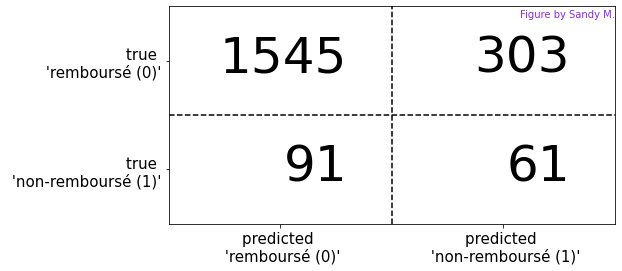

il y a : 
 1545 Vrais Négatifs                (le prêt a été remboursé) 
 303 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 91 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 61 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1848
           1       0.17      0.40      0.24       152

    accuracy                           0.80      2000
   macro avg       0.56      0.62      0.56      2000
weighted avg       0.89      0.80      0.84      2000

Gradient Boosting : ROC AUC=0.675 Dummy: ROC AUC=0.504


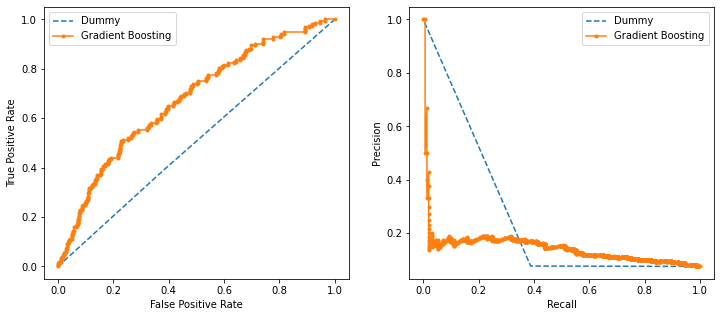

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,KNN,0.41,0.18,0.20,0.8,7572.0,757.0,9.0
1,Logistic Regression,0.42,0.25,0.19,0.3,13521.0,1352.0,14.0
2,Machines à Vecteurs de Support,0.13,0.13,0.11,32.8,1906.0,191.0,2.0
3,Arbre de décision,0.60,0.16,0.10,0.4,5241.0,524.0,11.0
11,Random Forest,0.19,0.21,0.18,11.5,5474.0,547.0,5.0
10,Gradient Boosting,0.40,0.24,0.15,2.9,13600.0,1360.0,15.0


In [53]:
prediction, y_test, score_auc, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'Gradient Boosting',
        mon_gbc,
        smote = mon_smote,
        pca = ma_PCA,
        afficher_roc = 'oui')

benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
df_modeles = my_eval.tableau_modeles(df_modeles, 'Gradient Boosting', prediction, y_test, score_auc, temps, benef, edem, edol, i)
i += 1
df_modeles


*Fonction by Sandy M.*

la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  83160.0 k$
le bénéfice sans modèle est  -27007.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  56153.0 k$
le bénéfice supplémentaire sans modèle est  0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  1359.96 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  14.65 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  48132.0 k$
la somme supplémentaire perdue avec modèle est  34532.0 k$
le bénéfice supplémentaire avec modèle e

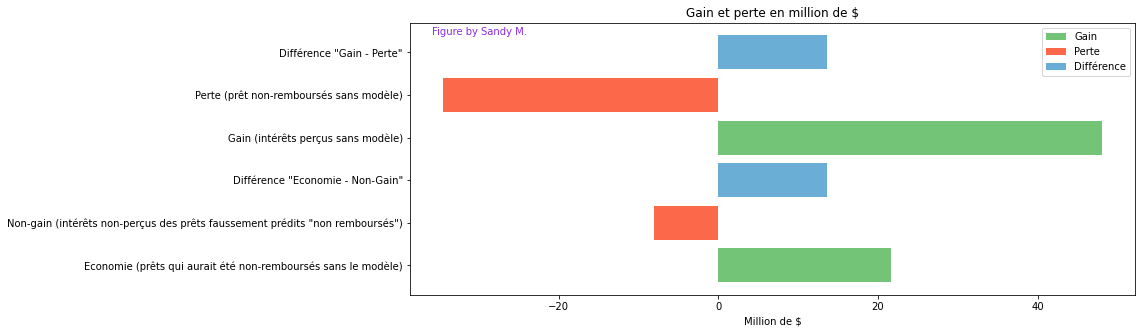

In [54]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

### XGBClassifier

In [55]:
mon_xgbc = eval(config['MY_MODELS']['my_xgbc'])
type(mon_xgbc)

xgboost.sklearn.XGBClassifier

L'algorithme XGBoost (eXtreme Gradient Boosting) est basé sur un algorithme d'arbres de décision boostés par gradient. 

Cette méthode utilise une meilleure meilleure technique de régularisation pour réduire le surapprentissage par rapport au simple Boosting par gradient.

Là encore, plusieurs hyperparamètres sont à optimiser.

[23:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.



*Fonction by Sandy M.*

temps de calcul : 10.5 sec
Matrice de confusion


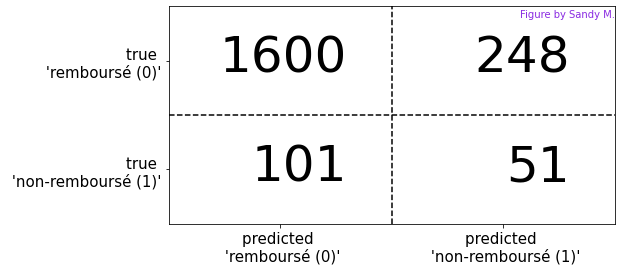

il y a : 
 1600 Vrais Négatifs                (le prêt a été remboursé) 
 248 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 101 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 51 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1848
           1       0.17      0.34      0.23       152

    accuracy                           0.83      2000
   macro avg       0.56      0.60      0.56      2000
weighted avg       0.88      0.83      0.85      2000

XGB Classifier : ROC AUC=0.685 Dummy: ROC AUC=0.466


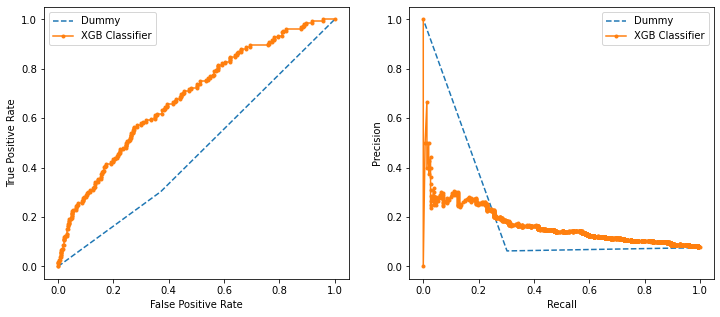

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,KNN,0.41,0.18,0.20,0.8,7572.0,757.0,9.0
1,Logistic Regression,0.42,0.25,0.19,0.3,13521.0,1352.0,14.0
2,Machines à Vecteurs de Support,0.13,0.13,0.11,32.8,1906.0,191.0,2.0
3,Arbre de décision,0.60,0.16,0.10,0.4,5241.0,524.0,11.0
11,XGB Classifier,0.34,0.23,0.17,10.5,9691.0,969.0,10.0
10,Gradient Boosting,0.40,0.24,0.15,2.9,13600.0,1360.0,15.0


In [56]:
prediction, y_test, score_auc, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'XGB Classifier',
        mon_xgbc,
        smote = mon_smote,
        pca = ma_PCA,
        afficher_roc = 'oui')

benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
df_modeles = my_eval.tableau_modeles(df_modeles, 'XGB Classifier', prediction, y_test, score_auc, temps, benef, edem, edol, i)
i += 1
df_modeles


*Fonction by Sandy M.*

la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  83160.0 k$
le bénéfice sans modèle est  -27007.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  56153.0 k$
le bénéfice supplémentaire sans modèle est  0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  969.06 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  10.07 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  50128.0 k$
la somme supplémentaire perdue avec modèle est  40437.0 k$
le bénéfice supplémentaire avec modèle es

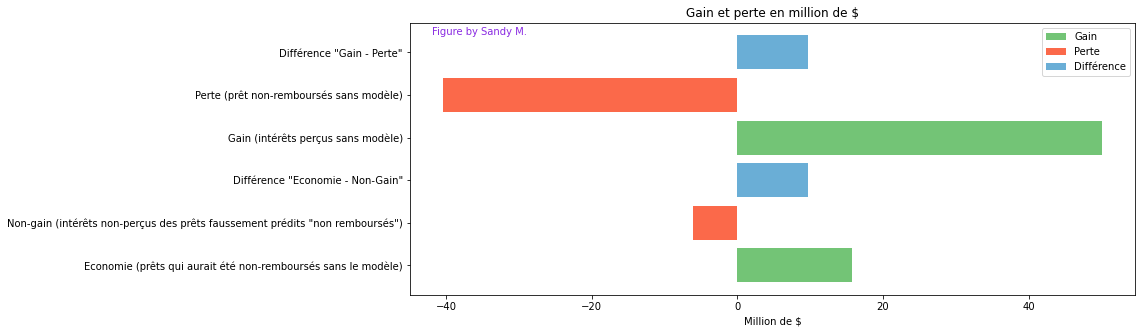

In [57]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

### LightGBM Classifier

In [58]:
mon_lgbmc = eval(config['MY_MODELS']['my_lgbmc'])
type(mon_lgbmc)

lightgbm.sklearn.LGBMClassifier

L'algorithme LightGBM Classifier est aussi un algorithme qui repose sur la tecjnoque de Boosting.


*Fonction by Sandy M.*

temps de calcul : 1.3 sec
Matrice de confusion


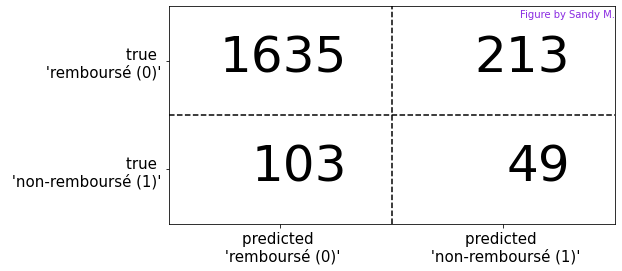

il y a : 
 1635 Vrais Négatifs                (le prêt a été remboursé) 
 213 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 103 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 49 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1848
           1       0.19      0.32      0.24       152

    accuracy                           0.84      2000
   macro avg       0.56      0.60      0.57      2000
weighted avg       0.88      0.84      0.86      2000

LGBM : ROC AUC=0.668 Dummy: ROC AUC=0.488


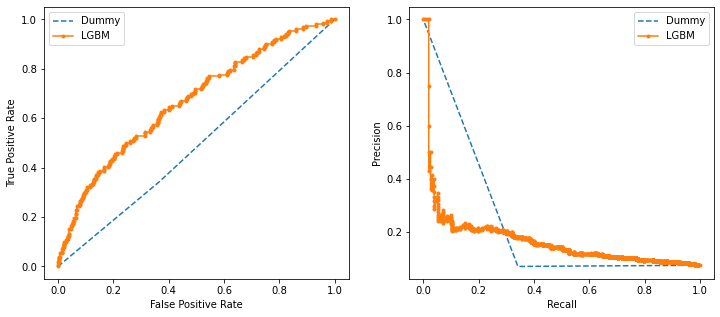

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,KNN,0.41,0.18,0.20,0.8,7572.0,757.0,9.0
1,Logistic Regression,0.42,0.25,0.19,0.3,13521.0,1352.0,14.0
2,Machines à Vecteurs de Support,0.13,0.13,0.11,32.8,1906.0,191.0,2.0
3,Arbre de décision,0.60,0.16,0.10,0.4,5241.0,524.0,11.0
11,XGB Classifier,0.34,0.23,0.17,10.5,9691.0,969.0,10.0
10,Gradient Boosting,0.40,0.24,0.15,2.9,13600.0,1360.0,15.0
12,LGBM,0.32,0.24,0.17,1.3,10307.0,1031.0,11.0


In [59]:
prediction, y_test, score_auc, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'LGBM',
        mon_lgbmc,
        smote = mon_smote,
        pca = ma_PCA,
        afficher_roc = 'oui')

benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
df_modeles = my_eval.tableau_modeles(df_modeles, 'LGBM', prediction, y_test, score_auc, temps, benef, edem, edol, i)
i += 1
df_modeles


*Fonction by Sandy M.*

la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  83160.0 k$
le bénéfice sans modèle est  -27007.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  56153.0 k$
le bénéfice supplémentaire sans modèle est  0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  1030.71 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  10.55 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  50862.0 k$
la somme supplémentaire perdue avec modèle est  40555.0 k$
le bénéfice supplémentaire avec modèle e

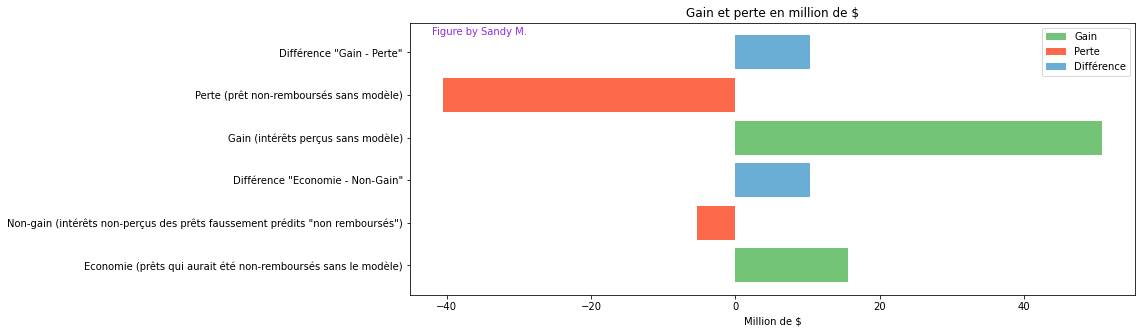

In [60]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

### MLP Classifier

In [61]:
mon_mlp = eval(config['MY_MODELS']['my_mlp'])
type(mon_mlp)

sklearn.neural_network._multilayer_perceptron.MLPClassifier

L'algorithme MLP Classifier est basé sur le principe du perceptron, qui est un neurone artificiel. Ce perceptron est l'un des rouages des réseaux de neurones, faisant passer l'algorithme dans le domaine du Deep Learning. Le perceptron est simplement une fonction mathématique. Sa construction se base sur le modèle des neurones biologiques. En effet, chaque perceptron reçoit una certain nombre de données. Il les examine, effectue des calculs et donne un résultat. Ce résultat est issu d'une fonction non-linéaire. Il permet ainsi l'apprentissage de modèles paramètriques qui sont construits à partir d'une combinaison linéaire de variable.

Grâce au perceptron, il est possible de construire un modèle avec un apprentissage basé sur des modèles de regression, de classification (binaire ou multiclasse). Dans notre cas, nous sommes dans le cas d'une fonction logistique (activation = 'logistic').

Au fur et à mesure de la construction du modèle, les poids sur les différentes variables sont ajustés grâce à la technique du gradient. L'empilement des neurones en réseau de neurones permet de modéliser des fonctions mathématiques complexes. 


*Fonction by Sandy M.*

temps de calcul : 2.7 sec
Matrice de confusion


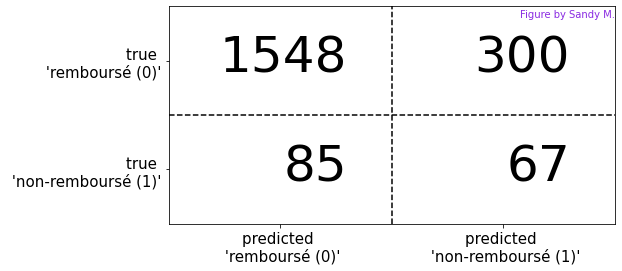

il y a : 
 1548 Vrais Négatifs                (le prêt a été remboursé) 
 300 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 85 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 67 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1848
           1       0.18      0.44      0.26       152

    accuracy                           0.81      2000
   macro avg       0.57      0.64      0.57      2000
weighted avg       0.89      0.81      0.84      2000

MLP : ROC AUC=0.720 Dummy: ROC AUC=0.548


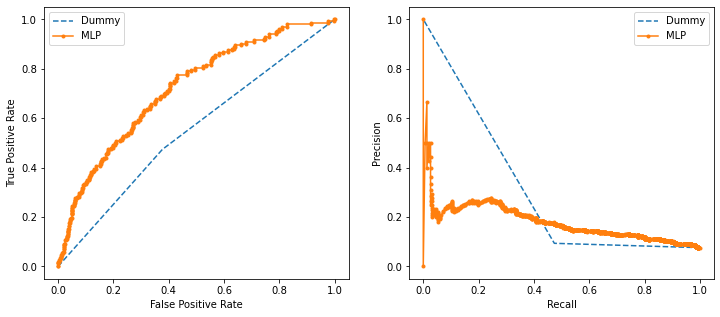

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,KNN,0.41,0.18,0.20,0.8,7572.0,757.0,9.0
1,Logistic Regression,0.42,0.25,0.19,0.3,13521.0,1352.0,14.0
2,Machines à Vecteurs de Support,0.13,0.13,0.11,32.8,1906.0,191.0,2.0
3,Arbre de décision,0.60,0.16,0.10,0.4,5241.0,524.0,11.0
11,XGB Classifier,0.34,0.23,0.17,10.5,9691.0,969.0,10.0
10,Gradient Boosting,0.40,0.24,0.15,2.9,13600.0,1360.0,15.0
12,LGBM,0.32,0.24,0.17,1.3,10307.0,1031.0,11.0
13,MLP,0.44,0.26,0.18,2.7,14709.0,1471.0,16.0


In [62]:
prediction, y_test, score_auc, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'MLP',
    mon_mlp,
            smote = mon_smote,
        pca = ma_PCA,
        afficher_roc = 'oui')
    

benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
df_modeles = my_eval.tableau_modeles(df_modeles, 'MLP', prediction, y_test, score_auc, temps, benef, edem, edol, i)
i += 1
df_modeles


*Fonction by Sandy M.*

la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  83160.0 k$
le bénéfice sans modèle est  -27007.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  56153.0 k$
le bénéfice supplémentaire sans modèle est  0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  1470.95 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  15.74 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  48420.0 k$
la somme supplémentaire perdue avec modèle est  33710.0 k$
le bénéfice supplémentaire avec modèle e

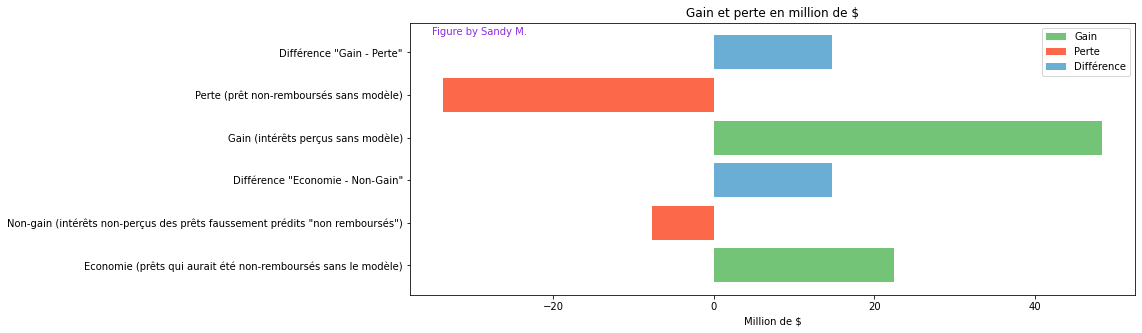

In [63]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

### Voting

In [64]:
nom_modeles = ['Logistic Regression','Gradient Boosting Classifier', 'MLPClassifier']
# Récupération des paramètres
config.read('my_config.ini')
mon_lr = eval(config['MY_MODELS']['my_lr_opti'])
mon_lr.set_params(**eval(config['MY_MODELS']['my_lr_params']))

mon_gbc = eval(config['MY_MODELS']['my_gbc_opti'])
mon_gbc.set_params(**eval(config['MY_MODELS']['my_gbc_params']))

mon_mlp = eval(config['MY_MODELS']['my_mlp'])

m1 = mon_lr
m2 = mon_gbc
m3 = mon_mlp
modeles = [m1, m2, m3]


*Fonction by Sandy M.*

temps de calcul : 1.0 sec
Matrice de confusion


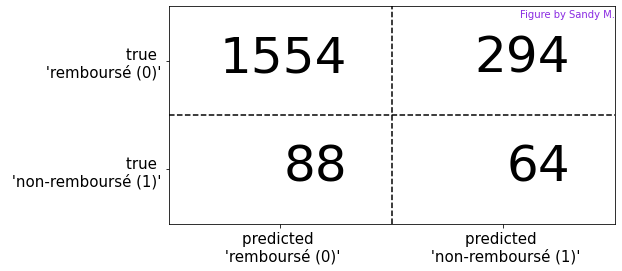

il y a : 
 1554 Vrais Négatifs                (le prêt a été remboursé) 
 294 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 88 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 64 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1848
           1       0.18      0.42      0.25       152

    accuracy                           0.81      2000
   macro avg       0.56      0.63      0.57      2000
weighted avg       0.89      0.81      0.84      2000

Voting : ROC AUC=0.722 Dummy: ROC AUC=0.519


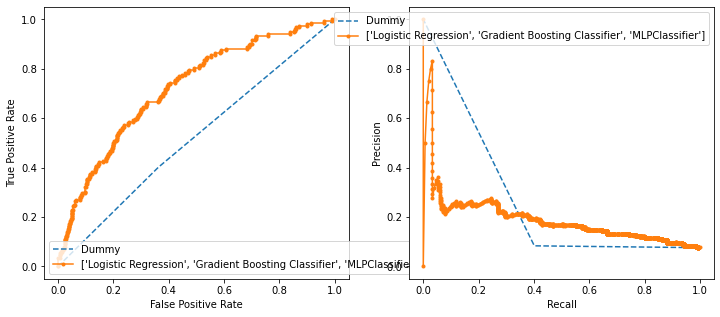

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,KNN,0.41,0.18,0.20,0.8,7572.0,757.0,9.0
1,Logistic Regression,0.42,0.25,0.19,0.3,13521.0,1352.0,14.0
2,Machines à Vecteurs de Support,0.13,0.13,0.11,32.8,1906.0,191.0,2.0
3,Arbre de décision,0.60,0.16,0.10,0.4,5241.0,524.0,11.0
11,XGB Classifier,0.34,0.23,0.17,10.5,9691.0,969.0,10.0
10,Gradient Boosting,0.40,0.24,0.15,2.9,13600.0,1360.0,15.0
12,LGBM,0.32,0.24,0.17,1.3,10307.0,1031.0,11.0
13,MLP,0.44,0.26,0.18,2.7,14709.0,1471.0,16.0
14,Voting,0.42,0.25,0.19,1.0,13471.0,1347.0,14.0


In [65]:
prediction, y_test, score_auc, temps = my_mdl_s.modele_voting(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        nom_modeles,
        modeles,
            smote = mon_smote,
        pca = ma_PCA, type_voting='soft',weight =[3,6,2],
        afficher_roc = 'oui')
    

benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
df_modeles = my_eval.tableau_modeles(df_modeles, 'Voting', prediction, y_test, score_auc, temps, benef, edem, edol, i)
i += 1
df_modeles


*Fonction by Sandy M.*

la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  83160.0 k$
le bénéfice sans modèle est  -27007.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  56153.0 k$
la somme perdue sans modèle est  56153.0 k$
le bénéfice supplémentaire sans modèle est  0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  1347.06 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  14.46 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  48319.0 k$
la somme supplémentaire perdue avec modèle est  34848.0 k$
le bénéfice supplémentaire avec modèle e

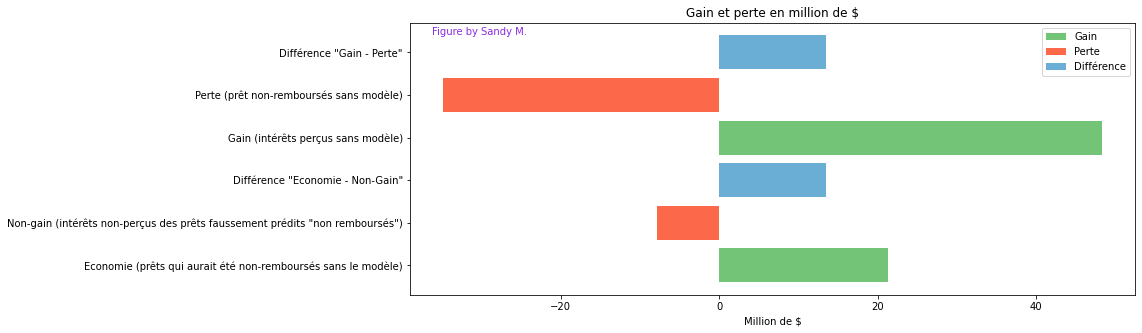

In [66]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

## Comparaison des différents modèles

In [67]:
df_modeles

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,KNN,0.41,0.18,0.20,0.8,7572.0,757.0,9.0
1,Logistic Regression,0.42,0.25,0.19,0.3,13521.0,1352.0,14.0
2,Machines à Vecteurs de Support,0.13,0.13,0.11,32.8,1906.0,191.0,2.0
3,Arbre de décision,0.60,0.16,0.10,0.4,5241.0,524.0,11.0
11,XGB Classifier,0.34,0.23,0.17,10.5,9691.0,969.0,10.0
10,Gradient Boosting,0.40,0.24,0.15,2.9,13600.0,1360.0,15.0
12,LGBM,0.32,0.24,0.17,1.3,10307.0,1031.0,11.0
13,MLP,0.44,0.26,0.18,2.7,14709.0,1471.0,16.0
14,Voting,0.42,0.25,0.19,1.0,13471.0,1347.0,14.0


Finalement, le meilleur modèle est celui établi grâce au modèle MLP. Mais en termes de scor recall seul c'st celui de l'arbre de décision..
En terme de modèles linéaires, le modèle de régression logistiques est bien meilleur tant au niveau des bénéfices supplémentaire qu'au niveau de temps de calcul.

Le modèle du Voting n'est finalement pas pertinent car il n'améliore pas plus que ça les performances et est bien plus lents que d'autres modèles plus performants.

# Influence des tailles d'échantillons et des différentes bases de données utilisées

## Effet de la taille de l'échantillon

In [68]:
application_train = pd.read_csv(chemin +
                                "application_train.csv",
                                low_memory=False)

df_nv = my_sp4.clean_fe_application(application_train)
df_nv.replace([np.inf, -np.inf], np.nan, inplace=True)
df_nv = df_nv.fillna(0)


*Fonction by Sandy M.*

La base de données avant nettoyage présente  307511 entrées pour  122 variables
~ Remplacement des valeurs erronées et des valeurs manquantes par "unknown" : effectué
~ Conversion des $ en k$ : effectué
~ Correction du signe des données en jours : effectué
~ Correction des valeurs aberrantes : effectué
~ Imputation des valeurs manquantes par les moyennes ou les médianes: effectué
~ Suppression des variables non-pertinentes pour cette étude : effectué

 -----L'étape de nettoyage des variables est terminée-----

La base de données après nettoyage présente 307506 entrées pour 56 variables.
 66 variables ont été écartées de l'étude et 56 variables ont été nettoyées
Ajout des variables 'MONTANT_PAR_JOB_MED',  'MONTANT_PAR_POSTE_MED' et 'MONTANT_PAR_EDU_MED'
Ajout des variables 'RAPPORT_CREDIT_INCOME',  'RAPPORT_ANNUITY_INCOME', 'RAPPORT_CREDIT_ANNUITY',  'RATIO_CREDIT_GOODS', 'EXT_SOURCES_MOY' et   'INCOME_PAR_MEMB_FAM'
Ajout des variables 'RATIO_CAR_BIRTH' et  'RATIO_PHONE_BIRTH'
Ajout des

In [69]:
df_resultats = []
i = 0

for samp in range(10000, 100000, 10000):
    df = df_nv.drop(columns=['SK_ID_CURR']).sample(samp)
    prediction, y_test, score_train, score_test, temps = my_mdl_s.modele_simple_basique(
        df,
        "TARGET",
        'Logistic Regression',
        mon_lr,
        pca = ma_PCA,
        smote = mon_smote,
        evaluation='oui')
    
    benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
    df_resultats = my_eval.tableau_resultats(df_resultats, prediction, y_test, score_train, score_test, temps, (benef/samp)*len(df_nv), edem, edol, samp, i)
    i += 1
df_resultats

,valeur paramètre,errors_train,errors_test,f1_Négatifs,f1_Positifs,recall,f1,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,10000.0,19.45,20.55,0.88,0.20,0.32,0.20,0.4,333090.50,1083.0,12.0
1,20000.0,19.36,19.55,0.89,0.25,0.41,0.25,0.7,400172.93,1301.0,14.0
2,30000.0,19.63,20.12,0.88,0.22,0.38,0.22,1.2,289404.15,941.0,10.0
3,40000.0,19.73,19.59,0.89,0.25,0.44,0.25,1.4,424481.28,1380.0,15.0
4,50000.0,19.67,19.55,0.89,0.28,0.43,0.28,1.8,458073.24,1490.0,16.0
5,60000.0,19.59,19.98,0.88,0.26,0.42,0.26,2.2,422964.25,1375.0,15.0
6,70000.0,19.87,19.69,0.89,0.26,0.43,0.26,2.7,437071.46,1421.0,16.0
7,80000.0,19.77,19.77,0.89,0.26,0.43,0.26,3.2,413564.82,1345.0,15.0
8,90000.0,19.60,19.37,0.89,0.26,0.43,0.26,3.7,421020.13,1369.0,15.0


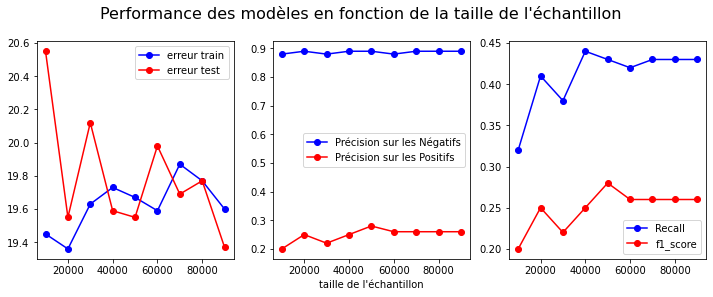

In [70]:
my_eval.graphiques_scores(
    df_resultats['valeur paramètre'], df_resultats['errors_train'],
    df_resultats['errors_test'], df_resultats['f1_Négatifs'],
    df_resultats['f1_Positifs'], df_resultats['recall'], df_resultats['f1'],
    "taille de l'échantillon",
    "Performance des modèles en fonction de la taille de l'échantillon"
)

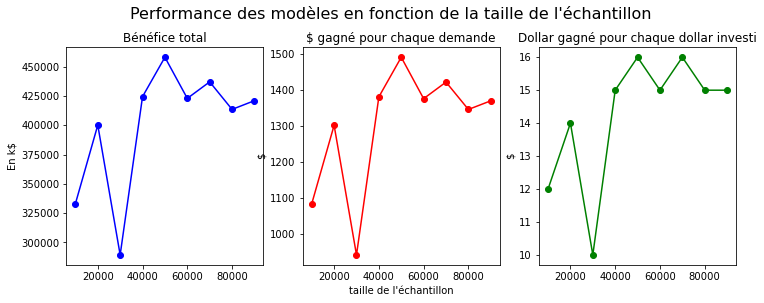

In [71]:
my_eval.graphiques_benefice(
    df_resultats['valeur paramètre'], df_resultats['Bénéfice Total'], df_resultats['Bénéfice par demande'],
    df_resultats['Bénéfice par dollar'], "taille de l'échantillon",
    "Performance des modèles en fonction de la taille de l'échantillon"
)

La taille de l'échantillon n'a pas d'influence sur les métriques comme le recall et la précision.
Par contre, elle a une forte influence sur le bénéfice supplémentaire par demande et par dollar investi. Il semblerait que la taille de l'échantillon optimale est de 20000.

## Apport des différentes bases de données et des nouvelles variables

### Application_train sans nouvelles variables

In [72]:
application_train = pd.read_csv(chemin +
                                "application_train.csv",
                                low_memory=False)

In [73]:
''' Cette fonction procède au nettoyage des variables
de la base de données application.
Elle effectue les opérations suivantes :
- Remplacement des valeurs erronées et des valeurs manquantes par "unknown"
- Conversion des $ en k$
- Correction du signe des données en jours
- Correction des valeurs aberrantes
- Imputation des valeurs manquantes par les moyennes ou les médianes.
Ces opérations ont été sélectionnées et mis en algorithme à la suite
d'une analyse exploratoire effectuée en amont.
Entrées :
df : le dataframe'''

df_sans_nv = my_sp4.clean_application(application_train)
df_sans_nv.replace([np.inf, -np.inf], np.nan, inplace=True)
df_sans_nv = df_sans_nv.fillna(0)


*Fonction by Sandy M.*

La base de données avant nettoyage présente  307511 entrées pour  122 variables
~ Remplacement des valeurs erronées et des valeurs manquantes par "unknown" : effectué
~ Conversion des $ en k$ : effectué
~ Correction du signe des données en jours : effectué
~ Correction des valeurs aberrantes : effectué
~ Imputation des valeurs manquantes par les moyennes ou les médianes: effectué
~ Suppression des variables non-pertinentes pour cette étude : effectué

 -----L'étape de nettoyage des variables est terminée-----

La base de données après nettoyage présente 307506 entrées pour 56 variables.
 66 variables ont été écartées de l'étude et 56 variables ont été nettoyées



*Fonction by Sandy M.*

temps de calcul : 0.7 sec
Matrice de confusion


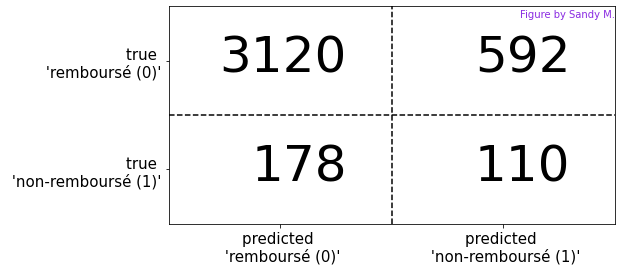

il y a : 
 3120 Vrais Négatifs                (le prêt a été remboursé) 
 592 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 178 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 110 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3712
           1       0.16      0.38      0.22       288

    accuracy                           0.81      4000
   macro avg       0.55      0.61      0.56      4000
weighted avg       0.89      0.81      0.84      4000

Logistic Regression : ROC AUC=0.681 Dummy: ROC AUC=0.503


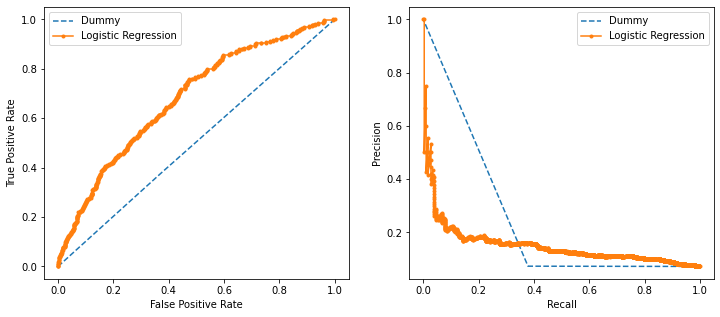

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,Sans les nouvelles variables,0.38,0.22,0.15,0.7,27131.0,1357.0,14.0


In [74]:
df_modeles = []
i = 0

df = df_sans_nv.sample(20000)
del df_sans_nv
prediction, y_test, score_auc, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'Logistic Regression',
        mon_lr,
        smote = mon_smote,
        pca = ma_PCA,
        afficher_roc = 'oui')

benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
df_modeles = my_eval.tableau_modeles(df_modeles, 'Sans les nouvelles variables', prediction, y_test, score_auc, temps, benef, edem, edol, i)
i += 1
df_modeles


*Fonction by Sandy M.*

la somme gagnée sans modèle est  112211.0 k$
la somme perdue sans modèle est  150459.0 k$
le bénéfice sans modèle est  -38248.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  112211.0 k$
la somme perdue sans modèle est  112211.0 k$
le bénéfice supplémentaire sans modèle est  -0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  1356.56 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  14.43 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  97502.0 k$
la somme supplémentaire perdue avec modèle est  70371.0 k$
le bénéfice supplémentaire avec mod

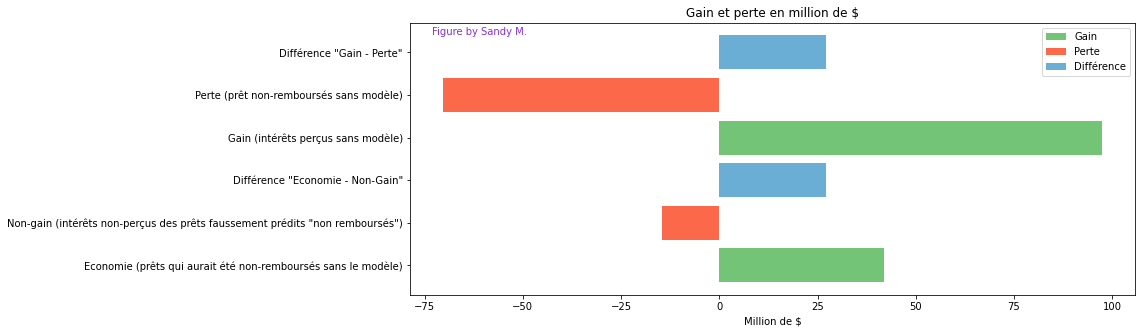

In [75]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

### Modèle pour un nouveau client (application_train uniquement)

In [76]:
application_train = pd.read_csv(chemin + "application_train.csv",
                                low_memory=False)

''' Cette fonction procède au nettoyage des variables
de la base de données application.
Ensuite, elle ajoute de nouvelles variables pertinentes
    à la base de données

Entrées :
df : le dataframe

Renvoie :
df : le dataframe nettoyé et avec de nouvelles variables'''
df_nv = my_sp4.clean_fe_application(application_train)
df_nv.replace([np.inf, -np.inf], np.nan, inplace=True)
df_nv = df_nv.fillna(0)


*Fonction by Sandy M.*

La base de données avant nettoyage présente  307511 entrées pour  122 variables
~ Remplacement des valeurs erronées et des valeurs manquantes par "unknown" : effectué
~ Conversion des $ en k$ : effectué
~ Correction du signe des données en jours : effectué
~ Correction des valeurs aberrantes : effectué
~ Imputation des valeurs manquantes par les moyennes ou les médianes: effectué
~ Suppression des variables non-pertinentes pour cette étude : effectué

 -----L'étape de nettoyage des variables est terminée-----

La base de données après nettoyage présente 307506 entrées pour 56 variables.
 66 variables ont été écartées de l'étude et 56 variables ont été nettoyées
Ajout des variables 'MONTANT_PAR_JOB_MED',  'MONTANT_PAR_POSTE_MED' et 'MONTANT_PAR_EDU_MED'
Ajout des variables 'RAPPORT_CREDIT_INCOME',  'RAPPORT_ANNUITY_INCOME', 'RAPPORT_CREDIT_ANNUITY',  'RATIO_CREDIT_GOODS', 'EXT_SOURCES_MOY' et   'INCOME_PAR_MEMB_FAM'
Ajout des variables 'RATIO_CAR_BIRTH' et  'RATIO_PHONE_BIRTH'
Ajout des


*Fonction by Sandy M.*

temps de calcul : 0.7 sec
Matrice de confusion


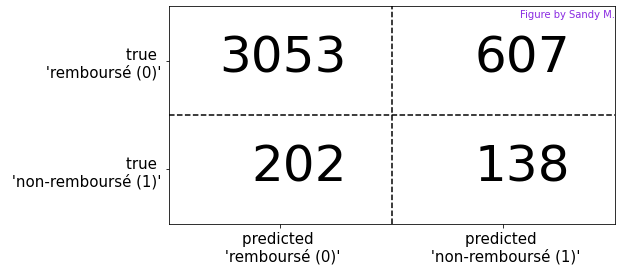

il y a : 
 3053 Vrais Négatifs                (le prêt a été remboursé) 
 607 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 202 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 138 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      3660
           1       0.19      0.41      0.25       340

    accuracy                           0.80      4000
   macro avg       0.56      0.62      0.57      4000
weighted avg       0.87      0.80      0.83      4000

Logistic Regression : ROC AUC=0.688 Dummy: ROC AUC=0.500


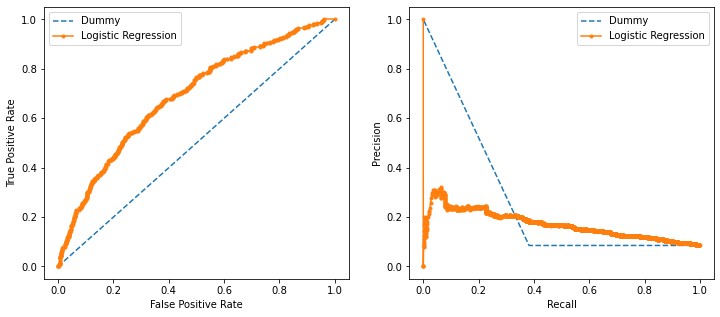

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,Sans les nouvelles variables,0.38,0.22,0.15,0.7,27131.0,1357.0,14.0
1,Avec les nouvelles variables,0.41,0.25,0.17,0.7,26028.0,1301.0,15.0


In [77]:
df = df_nv.sample(20000)
del df_nv
prediction, y_test, score_auc, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'Logistic Regression',
        mon_lr,
        smote = mon_smote,
        pca = ma_PCA,
        afficher_roc = 'oui')

benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
df_modeles = my_eval.tableau_modeles(df_modeles, 'Avec les nouvelles variables', prediction, y_test, score_auc, temps, benef, edem, edol, i)
i += 1
df_modeles


*Fonction by Sandy M.*

la somme gagnée sans modèle est  107927.0 k$
la somme perdue sans modèle est  185922.0 k$
le bénéfice sans modèle est  -77995.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  107927.0 k$
la somme perdue sans modèle est  107927.0 k$
le bénéfice supplémentaire sans modèle est  -0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  1301.42 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  14.81 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  91113.0 k$
la somme supplémentaire perdue avec modèle est  65085.0 k$
le bénéfice supplémentaire avec mod

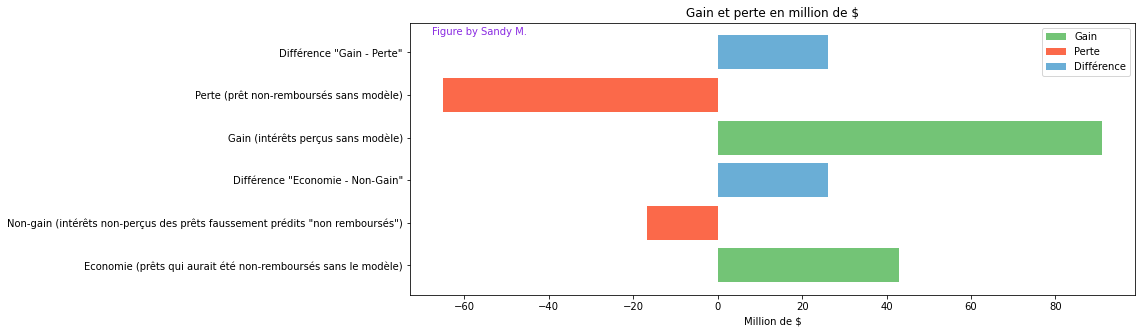

In [78]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

### Modèle pour un client ayant déjà eu un accord de prêt (application_train et bureau)

In [79]:
application_train = pd.read_csv(chemin + "application_train.csv",
                                low_memory=False)

application_train = my_sp4.clean_fe_application(application_train)

bureau = pd.read_csv(chemin + "bureau.csv", low_memory=False)

""" Cette fonction procède au nettoyage et à l'ajout de nouvelles
variables pour la base de données bureau

Entrées :
bureau : base de données bureau
Renvoie :
bureau : base de données nettoyées avec les nouvelles variables"""
bureau = my_sp4.bureau_fe(bureau)

bureau_balance = pd.read_csv(chemin + "bureau_balance.csv", low_memory=False)

bb_net = my_sp4.bureau_and_balance_net(bureau, bureau_balance)

df_bur = my_sp4.application_bureau(application_train, bb_net)

df_bur.replace([np.inf, -np.inf], np.nan, inplace=True)
df_bur = df_bur.fillna(0)


*Fonction by Sandy M.*

La base de données avant nettoyage présente  307511 entrées pour  122 variables
~ Remplacement des valeurs erronées et des valeurs manquantes par "unknown" : effectué
~ Conversion des $ en k$ : effectué
~ Correction du signe des données en jours : effectué
~ Correction des valeurs aberrantes : effectué
~ Imputation des valeurs manquantes par les moyennes ou les médianes: effectué
~ Suppression des variables non-pertinentes pour cette étude : effectué

 -----L'étape de nettoyage des variables est terminée-----

La base de données après nettoyage présente 307506 entrées pour 56 variables.
 66 variables ont été écartées de l'étude et 56 variables ont été nettoyées
Ajout des variables 'MONTANT_PAR_JOB_MED',  'MONTANT_PAR_POSTE_MED' et 'MONTANT_PAR_EDU_MED'
Ajout des variables 'RAPPORT_CREDIT_INCOME',  'RAPPORT_ANNUITY_INCOME', 'RAPPORT_CREDIT_ANNUITY',  'RATIO_CREDIT_GOODS', 'EXT_SOURCES_MOY' et   'INCOME_PAR_MEMB_FAM'
Ajout des variables 'RATIO_CAR_BIRTH' et  'RATIO_PHONE_BIRTH'
Ajout des


*Fonction by Sandy M.*

Ajout de la variable 'NB_CREDIT_CLIENT'
Ajout des variables 'MOY_J_DEPASS', 'NB_TOT_J_DEPASS','MOY_PROLONG'et 'NB_PROLONG'
Ajout des variables  'RATIO_CLOS', 'RATIO_ACTIF' et 'RATIO_BAD'
Ajout des variables  'RATIO_CURRENCY_1', 'RATIO_CURRENCY_2','RATIO_CURRENCY_3', et 'RATIO_CURRENCY_4'
Ajout des variables  'RATIO_TYPE' et 'TYPE_CREDIT_CLIENT'
Ajout des variables 'MOY_DUREE_CREDIT', 'ratio_nb_retard','ratio_nb_avance','moy_ratio_jours_retard' et'moy_ratio_jours_avance'
Ajout des variables 'AMT_CREDIT_MAX_OVERDUE_k_MEAN','AMT_CREDIT_MAX_OVERDUE_k_MAX','AMT_CREDIT_SUM_k_MEAN','AMT_CREDIT_SUM_k_SUM'
Ajout des variables 'MOY_DEBT', 'SOMME_DEBT', 'MOY_LIMIT','SOMME_LIMIT', 'MOY_OVERDUE', 'SOMME_OVERDUE', 'MOY_ANNUITY'et 'SOMME_ANNUITY'
la base de données bureau a été nettoyée et 31 nouvelles variables ont été crées



*Fonction by Sandy M.*

les bases de données bureau et bureau_balance ont été assemblées
les bases de données bureau et bureau_balance ont été moyennées suivant SK_ID_CURR
df shape: (307506, 115)



*Fonction by Sandy M.*

temps de calcul : 0.9 sec
Matrice de confusion


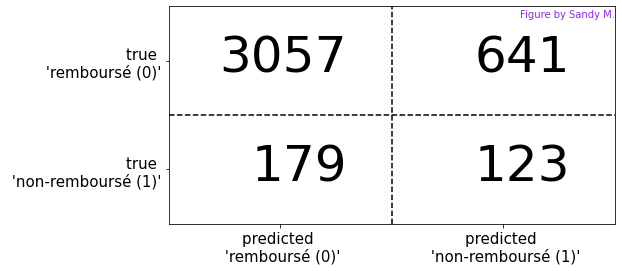

il y a : 
 3057 Vrais Négatifs                (le prêt a été remboursé) 
 641 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 179 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 123 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      3698
           1       0.16      0.41      0.23       302

    accuracy                           0.80      4000
   macro avg       0.55      0.62      0.56      4000
weighted avg       0.89      0.80      0.83      4000

Logistic Regression : ROC AUC=0.654 Dummy: ROC AUC=0.490


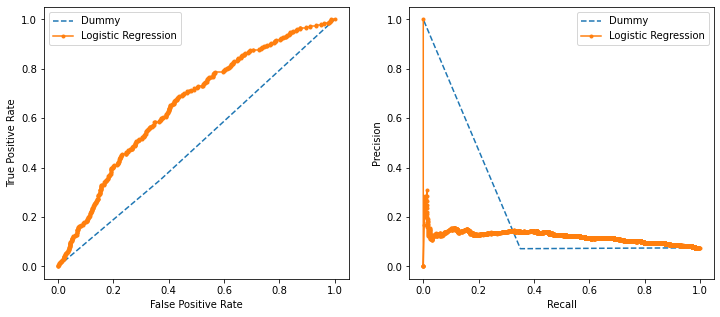

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,Sans les nouvelles variables,0.38,0.22,0.15,0.7,27131.0,1357.0,14.0
1,Avec les nouvelles variables,0.41,0.25,0.17,0.7,26028.0,1301.0,15.0
2,Avec les nouvelles variables et la prise en co...,0.41,0.23,0.12,0.9,24155.0,1208.0,13.0


In [80]:
df = df_bur.sample(20000)
del df_bur
prediction, y_test, score_auc, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'Logistic Regression',
        mon_lr,
        smote = mon_smote,
        pca = ma_PCA,
        afficher_roc = 'oui')

benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
df_modeles = my_eval.tableau_modeles(df_modeles, 'Avec les nouvelles variables et la prise en compte du fichier bureau', prediction, y_test, score_auc, temps, benef, edem, edol, i)
i += 1
df_modeles


*Fonction by Sandy M.*

la somme gagnée sans modèle est  111470.0 k$
la somme perdue sans modèle est  169097.0 k$
le bénéfice sans modèle est  -57627.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  111470.0 k$
la somme perdue sans modèle est  111470.0 k$
le bénéfice supplémentaire sans modèle est  0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  1207.77 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  13.17 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  95252.0 k$
la somme supplémentaire perdue avec modèle est  71097.0 k$
le bénéfice supplémentaire avec modè

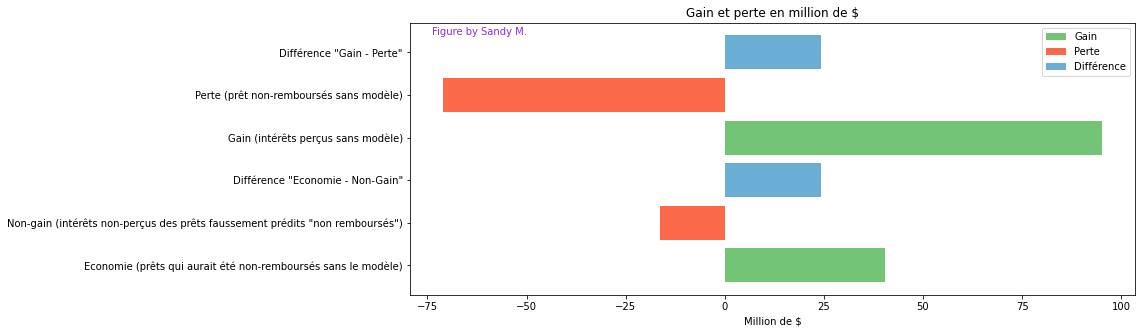

In [81]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

### Modèle pour un client ayant déjà eu un accord de prêt (application_train, bureau et les 4 autres bases de données)

In [82]:
application_train = pd.read_csv(chemin + "application_train.csv",
                                low_memory=False)

application_train = my_sp4.clean_fe_application(application_train)

bureau = pd.read_csv(chemin + "bureau.csv", low_memory=False)

bureau = my_sp4.bureau_fe(bureau)

bureau_balance = pd.read_csv(chemin + "bureau_balance.csv", low_memory=False)

bb_net = my_sp4.bureau_and_balance_net(bureau, bureau_balance)

df = my_sp4.application_bureau(application_train, bb_net)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

""" Cette fonction permet de rajouter les autres bases de données à la base de données application
Entrées :
df : la base de données application
chemin : le chemin des autres bases de données
Renvoie :
df : la base de données complêtée"""

df = my_sp4.ajout_all_bdd(df, chemin)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)


*Fonction by Sandy M.*

La base de données avant nettoyage présente  307511 entrées pour  122 variables
~ Remplacement des valeurs erronées et des valeurs manquantes par "unknown" : effectué
~ Conversion des $ en k$ : effectué
~ Correction du signe des données en jours : effectué
~ Correction des valeurs aberrantes : effectué
~ Imputation des valeurs manquantes par les moyennes ou les médianes: effectué
~ Suppression des variables non-pertinentes pour cette étude : effectué

 -----L'étape de nettoyage des variables est terminée-----

La base de données après nettoyage présente 307506 entrées pour 56 variables.
 66 variables ont été écartées de l'étude et 56 variables ont été nettoyées
Ajout des variables 'MONTANT_PAR_JOB_MED',  'MONTANT_PAR_POSTE_MED' et 'MONTANT_PAR_EDU_MED'
Ajout des variables 'RAPPORT_CREDIT_INCOME',  'RAPPORT_ANNUITY_INCOME', 'RAPPORT_CREDIT_ANNUITY',  'RATIO_CREDIT_GOODS', 'EXT_SOURCES_MOY' et   'INCOME_PAR_MEMB_FAM'
Ajout des variables 'RATIO_CAR_BIRTH' et  'RATIO_PHONE_BIRTH'
Ajout des


*Fonction by Sandy M.*

Ajout de la variable 'NB_CREDIT_CLIENT'
Ajout des variables 'MOY_J_DEPASS', 'NB_TOT_J_DEPASS','MOY_PROLONG'et 'NB_PROLONG'
Ajout des variables  'RATIO_CLOS', 'RATIO_ACTIF' et 'RATIO_BAD'
Ajout des variables  'RATIO_CURRENCY_1', 'RATIO_CURRENCY_2','RATIO_CURRENCY_3', et 'RATIO_CURRENCY_4'
Ajout des variables  'RATIO_TYPE' et 'TYPE_CREDIT_CLIENT'
Ajout des variables 'MOY_DUREE_CREDIT', 'ratio_nb_retard','ratio_nb_avance','moy_ratio_jours_retard' et'moy_ratio_jours_avance'
Ajout des variables 'AMT_CREDIT_MAX_OVERDUE_k_MEAN','AMT_CREDIT_MAX_OVERDUE_k_MAX','AMT_CREDIT_SUM_k_MEAN','AMT_CREDIT_SUM_k_SUM'
Ajout des variables 'MOY_DEBT', 'SOMME_DEBT', 'MOY_LIMIT','SOMME_LIMIT', 'MOY_OVERDUE', 'SOMME_OVERDUE', 'MOY_ANNUITY'et 'SOMME_ANNUITY'
la base de données bureau a été nettoyée et 31 nouvelles variables ont été crées



*Fonction by Sandy M.*

les bases de données bureau et bureau_balance ont été assemblées
les bases de données bureau et bureau_balance ont été moyennées suivant SK_ID_CURR
df shape: (307506, 115)
Previous applications df shape: (338857, 240)
Pos-cash balance df shape: (337252, 18)
Installments payments df shape: (339587, 24)
Credit card balance df shape: (103558, 141)
df shape: (307506, 538)



*Fonction by Sandy M.*

temps de calcul : 2.6 sec
Matrice de confusion


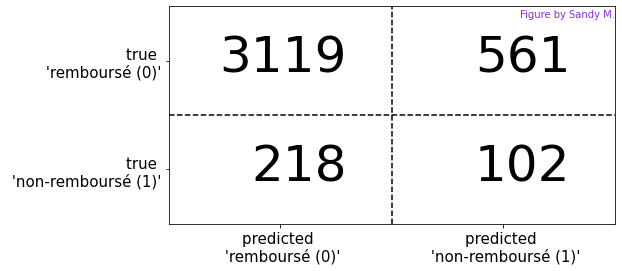

il y a : 
 3119 Vrais Négatifs                (le prêt a été remboursé) 
 561 Faux Positifs (le prêt n'a pas été remboursé,                le modèle dit que oui) 
 218 Faux Négatifs (le prêt a été remboursé,                le modèle dit que non)
 102 Vrais Positifs (le prêt n'a pas été remboursé) 

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      3680
           1       0.15      0.32      0.21       320

    accuracy                           0.81      4000
   macro avg       0.54      0.58      0.55      4000
weighted avg       0.87      0.81      0.83      4000

Logistic Regression : ROC AUC=0.660 Dummy: ROC AUC=0.501


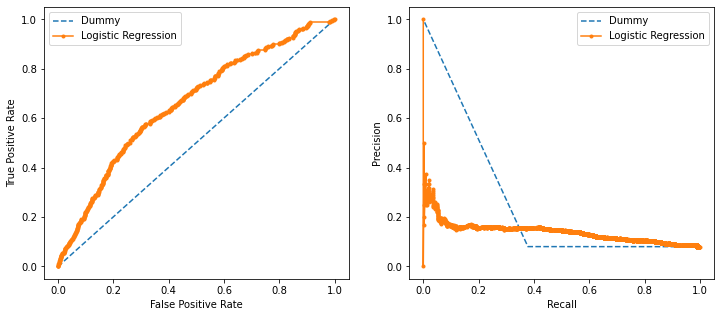

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,Sans les nouvelles variables,0.38,0.22,0.15,0.7,27131.0,1357.0,14.0
1,Avec les nouvelles variables,0.41,0.25,0.17,0.7,26028.0,1301.0,15.0
2,Avec les nouvelles variables et la prise en co...,0.41,0.23,0.12,0.9,24155.0,1208.0,13.0
3,Avec les nouvelles variables et la prise en co...,0.32,0.21,0.14,2.6,12804.0,640.0,7.0


In [83]:
df = df.sample(20000)
prediction, y_test, score_auc, temps = my_mdl_s.modele_simple_basique(
        df.drop(columns=['SK_ID_CURR']),
        "TARGET",
        'Logistic Regression',
        mon_lr,
        smote = mon_smote,
        pca = ma_PCA,
        afficher_roc = 'oui')

benef, edem, edol = my_eval.benefice(y_test, prediction, df, return_values='oui')
    
df_modeles = my_eval.tableau_modeles(df_modeles, 'Avec les nouvelles variables et la prise en compte des 5 autres bases de données', prediction, y_test, score_auc, temps, benef, edem, edol, i)
i += 1
df_modeles


*Fonction by Sandy M.*

la somme gagnée sans modèle est  110519.0 k$
la somme perdue sans modèle est  193941.0 k$
le bénéfice sans modèle est  -83422.0 k$
---------------------------------------------------------              ---------------------------------
Après équilibrage des sommes perdues/gagnées :
la somme gagnée sans modèle est  110519.0 k$
la somme perdue sans modèle est  110519.0 k$
le bénéfice supplémentaire sans modèle est  -0.0 k$
----------------------------------------------------------              --------------------------------
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  640.19 $ par client
Grâce à ce modèle, la banque fait un bénéfice               supplémentaire de  6.8 $ pour chaque dollar gagné
--------------------------------------------------              ----------------------------------------
la somme supplémentaire gagnée avec modèle est  98391.0 k$
la somme supplémentaire perdue avec modèle est  85587.0 k$
le bénéfice supplémentaire avec modèle

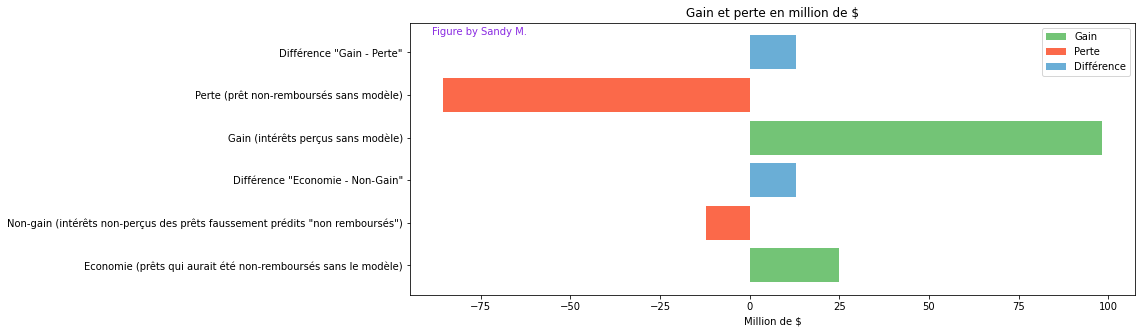

In [84]:
# Calcul des bénéfices qui auraient été réalisés grâce au modèle
my_eval.benefice(y_test, prediction,df,texte = 'oui', graph = 'oui')

In [85]:
df_modeles

,Modèle,recall,f1,auc,temps de calcul,Bénéfice Total,Bénéfice par demande,Bénéfice par dollar
0,Sans les nouvelles variables,0.38,0.22,0.15,0.7,27131.0,1357.0,14.0
1,Avec les nouvelles variables,0.41,0.25,0.17,0.7,26028.0,1301.0,15.0
2,Avec les nouvelles variables et la prise en co...,0.41,0.23,0.12,0.9,24155.0,1208.0,13.0
3,Avec les nouvelles variables et la prise en co...,0.32,0.21,0.14,2.6,12804.0,640.0,7.0


Les bénéfices supplémentaires par dollar investi sont les suivants :
- 14\$ pour la base de données application_train uniquement, sans nouvelles variables (avec seulement le nettoyage)
- 15\$ pour la base de données application_train uniquement, avec nouvelles variables (et avec le nettoyage)
- 13\$ pour la base de données application_train et bureau, avec nouvelles variables (et avec le nettoyage)
- 7\$ pour l'intégralité des bases de données, avec nouvelles variables (et avec le nettoyage)

La base de données avec les nouvelles variables donnent les meilleurs résultats. Il n'est pas utile de passer du temps à faire des calculs avec les autres bases de données.